### St&auml;dtedaten aus ch.csv in Dictionary schreiben

***
&Ouml;ffne ch.csv, lies alle Zeilen ein und entferne white-space von rechts
***

In [1]:
lines = []
# Filename anpassen, so dass dein File geoeffnet wird
with open('/home/jovyan/work/NIA22Prog/data/ch.csv', mode ='r') as f:
    for line in f:
        lines.append(line.rstrip().split(','))
        
lines[:2]        

[['city',
  'lat',
  'lng',
  'country',
  'iso2',
  'admin_name',
  'capital',
  'population',
  'population_proper'],
 ['Zürich',
  '47.3786',
  '8.5400',
  'Switzerland',
  'CH',
  'Zürich',
  'admin',
  '434008',
  '434008']]

In [2]:
lines[-2:]

[['Münster-Geschinen',
  '46.4833',
  '8.2500',
  'Switzerland',
  'CH',
  'Valais',
  'minor',
  '',
  ''],
 ['Tiefencastel',
  '46.6450',
  '9.6131',
  'Switzerland',
  'CH',
  'Graubünden',
  'minor',
  '',
  '']]

***
Dictionary erstellen mit den St&auml;dtenamen als Schl&uuml;ssel.  
Die Werte sind Dictionaries der Form  
`{'lat': 47.3786,
  'lng': 8.54,
  'population': 434008}
`  
**Beachte**: Population hat manchmal den Wert `''`.  
Wir ersetzen diesen Wert durch `'0'`, bevor wir ihn mit
`int('0')` in einen Integer umwandeln.
***

***
Dictionary `cities` erstellen, Variante 1
***

In [3]:
fields = (1, 2, 7)
cities = {}
keys   = [lines[0][i] for i in fields]

for row in lines[1:]:
    data = [float(row[1]), 
            float(row[2]), 
            int(row[7] or '0')] # ist row[7] == '' wird '0' genommen
    
    city = row[0]
    cities[city] = dict(zip(keys, data))

In [4]:
{k:cities[k] for k in list(cities)[:3]}

{'Zürich': {'lat': 47.3786, 'lng': 8.54, 'population': 434008},
 'Geneva': {'lat': 46.2, 'lng': 6.15, 'population': 201818},
 'Basel': {'lat': 47.5606, 'lng': 7.5906, 'population': 177595}}

In [5]:
{k:cities[k] for k in list(cities)[-2:]}

{'Münster-Geschinen': {'lat': 46.4833, 'lng': 8.25, 'population': 0},
 'Tiefencastel': {'lat': 46.645, 'lng': 9.6131, 'population': 0}}

***
Dictionary `cities` erstellen, Variante 2
***

In [6]:
# Zu extrahierende Felder, gewuenschter Typ
fields = {1:float, 2:float, 7: int}
keys   = [lines[0][i] for i in fields]

cities = {}
for row in lines[1:]:
    data = [f(row[i] or '0') for i,f in fields.items()]
    city = row[0]
    cities[city] = dict(zip(keys, data))

In [7]:
{k:cities[k] for k in list(cities)[:3] + list(cities)[-2:]}

{'Zürich': {'lat': 47.3786, 'lng': 8.54, 'population': 434008},
 'Geneva': {'lat': 46.2, 'lng': 6.15, 'population': 201818},
 'Basel': {'lat': 47.5606, 'lng': 7.5906, 'population': 177595},
 'Münster-Geschinen': {'lat': 46.4833, 'lng': 8.25, 'population': 0},
 'Tiefencastel': {'lat': 46.645, 'lng': 9.6131, 'population': 0}}

***
Cities Dictionary als Modul speichern
***

In [8]:
with open('cities.py', mode = 'w') as f:
    f.write('cities = {}'.format(cities.__repr__()))

In [9]:
# %load cities.py
cities = {'Zürich': {'lat': 47.3786, 'lng': 8.54, 'population': 434008}, 'Geneva': {'lat': 46.2, 'lng': 6.15, 'population': 201818}, 'Basel': {'lat': 47.5606, 'lng': 7.5906, 'population': 177595}, 'Lausanne': {'lat': 46.5333, 'lng': 6.6333, 'population': 138905}, 'Bern': {'lat': 46.948, 'lng': 7.4474, 'population': 133798}, 'Winterthur': {'lat': 47.4992, 'lng': 8.7267, 'population': 109775}, 'Lucerne': {'lat': 47.0523, 'lng': 8.3059, 'population': 81691}, 'Sankt Gallen': {'lat': 47.4233, 'lng': 9.3772, 'population': 75833}, 'Lugano': {'lat': 46.0103, 'lng': 8.9625, 'population': 63185}, 'Biel/Bienne': {'lat': 47.1372, 'lng': 7.2472, 'population': 54456}, 'Thun': {'lat': 46.759, 'lng': 7.63, 'population': 43743}, 'Bellinzona': {'lat': 46.1956, 'lng': 9.0238, 'population': 43220}, 'Köniz': {'lat': 46.925, 'lng': 7.4153, 'population': 41507}, 'La Chaux-de-Fonds': {'lat': 47.0996, 'lng': 6.8296, 'population': 38965}, 'Fribourg': {'lat': 46.8, 'lng': 7.15, 'population': 38365}, 'Schaffhausen': {'lat': 47.6965, 'lng': 8.6339, 'population': 36587}, 'Vernier': {'lat': 46.2, 'lng': 6.1, 'population': 35132}, 'Chur': {'lat': 46.8521, 'lng': 9.5297, 'population': 35038}, 'Sion': {'lat': 46.2304, 'lng': 7.3661, 'population': 34708}, 'Uster': {'lat': 47.3492, 'lng': 8.7192, 'population': 34442}, 'Neuchâtel': {'lat': 46.9903, 'lng': 6.9306, 'population': 33475}, 'Landecy': {'lat': 46.1897, 'lng': 6.1158, 'population': 31942}, 'Zug': {'lat': 47.1681, 'lng': 8.5169, 'population': 30542}, 'Yverdon-les-Bains': {'lat': 46.7785, 'lng': 6.6408, 'population': 30157}, 'Emmen': {'lat': 47.0772, 'lng': 8.3, 'population': 29292}, 'Dübendorf': {'lat': 47.3981, 'lng': 8.6194, 'population': 28002}, 'Kriens': {'lat': 47.0344, 'lng': 8.28, 'population': 26997}, 'Rapperswil-Jona': {'lat': 47.2286, 'lng': 8.8317, 'population': 26989}, 'Dietikon': {'lat': 47.4056, 'lng': 8.4039, 'population': 26936}, 'Montreux': {'lat': 46.4333, 'lng': 6.9167, 'population': 25984}, 'Wetzikon': {'lat': 47.3208, 'lng': 8.7931, 'population': 24452}, 'Baar': {'lat': 47.1956, 'lng': 8.5264, 'population': 24322}, 'Meyrin': {'lat': 46.2322, 'lng': 6.0791, 'population': 24144}, 'Wil': {'lat': 47.6058, 'lng': 8.5075, 'population': 1425}, 'Bulle': {'lat': 46.6167, 'lng': 7.05, 'population': 22709}, 'Horgen': {'lat': 47.2608, 'lng': 8.5975, 'population': 22662}, 'Carouge': {'lat': 46.1817, 'lng': 6.1404, 'population': 22336}, 'Frauenfeld': {'lat': 47.558, 'lng': 8.8964, 'population': 21979}, 'Kreuzlingen': {'lat': 47.6458, 'lng': 9.1783, 'population': 21801}, 'Wädenswil': {'lat': 47.2303, 'lng': 8.6722, 'population': 21716}, 'Riehen': {'lat': 47.5794, 'lng': 7.6512, 'population': 21448}, 'Aarau': {'lat': 47.3923, 'lng': 8.0446, 'population': 21268}, 'Allschwil': {'lat': 47.5508, 'lng': 7.5358, 'population': 21150}, 'Renens': {'lat': 46.5353, 'lng': 6.5897, 'population': 20927}, 'Wettingen': {'lat': 47.4659, 'lng': 8.3267, 'population': 20721}, 'Nyon': {'lat': 46.382, 'lng': 6.2389, 'population': 20272}, 'Bülach': {'lat': 47.5189, 'lng': 8.5422, 'population': 20046}, 'Vevey': {'lat': 46.4667, 'lng': 6.85, 'population': 19891}, 'Opfikon': {'lat': 47.4331, 'lng': 8.5719, 'population': 19864}, 'Kloten': {'lat': 47.4481, 'lng': 8.5828, 'population': 19362}, 'Reinach': {'lat': 47.2539, 'lng': 8.1833, 'population': 8498}, 'Baden': {'lat': 47.4729, 'lng': 8.308, 'population': 19122}, 'Onex': {'lat': 46.1833, 'lng': 6.1, 'population': 18977}, 'Adliswil': {'lat': 47.3122, 'lng': 8.5256, 'population': 18731}, 'Schlieren': {'lat': 47.3989, 'lng': 8.4497, 'population': 18666}, 'Volketswil': {'lat': 47.3906, 'lng': 8.6953, 'population': 18615}, 'Pully': {'lat': 46.5167, 'lng': 6.6667, 'population': 18313}, 'Regensdorf': {'lat': 47.4383, 'lng': 8.4744, 'population': 18253}, 'Gossau': {'lat': 47.3081, 'lng': 8.7567, 'population': 9937}, 'Muttenz': {'lat': 47.5228, 'lng': 7.6452, 'population': 17805}, 'Thalwil': {'lat': 47.2953, 'lng': 8.5647, 'population': 17784}, 'Monthey': {'lat': 46.25, 'lng': 6.95, 'population': 17563}, 'Ostermundigen': {'lat': 46.9553, 'lng': 7.4833, 'population': 17546}, 'Littau': {'lat': 47.0494, 'lng': 8.2639, 'population': 17224}, 'Grenchen': {'lat': 47.1931, 'lng': 7.3958, 'population': 17140}, 'Olten': {'lat': 47.3531, 'lng': 7.9078, 'population': 17133}, 'Sierre': {'lat': 46.2918, 'lng': 7.532, 'population': 16860}, 'Solothurn': {'lat': 47.2081, 'lng': 7.5375, 'population': 16777}, 'Pratteln': {'lat': 47.5185, 'lng': 7.6928, 'population': 16621}, 'Burgdorf': {'lat': 47.0567, 'lng': 7.6264, 'population': 16280}, 'Freienbach': {'lat': 47.2047, 'lng': 8.7578, 'population': 16269}, 'Wohlen': {'lat': 47.3506, 'lng': 8.2778, 'population': 16078}, 'Locarno': {'lat': 46.1664, 'lng': 8.7997, 'population': 16012}, 'Wallisellen': {'lat': 47.4122, 'lng': 8.5922, 'population': 15855}, 'Morges': {'lat': 46.5094, 'lng': 6.4986, 'population': 15838}, 'Steffisburg': {'lat': 46.7831, 'lng': 7.6333, 'population': 15816}, 'Herisau': {'lat': 47.3851, 'lng': 9.2786, 'population': 15780}, 'Langenthal': {'lat': 47.2153, 'lng': 7.7889, 'population': 15639}, 'Binningen': {'lat': 47.5333, 'lng': 7.5667, 'population': 15580}, 'Einsiedeln': {'lat': 47.1278, 'lng': 8.7431, 'population': 15550}, 'Lyss': {'lat': 47.075, 'lng': 7.3069, 'population': 15279}, 'Mendrisio': {'lat': 45.8667, 'lng': 8.9833, 'population': 14942}, 'Arbon': {'lat': 47.5167, 'lng': 9.4333, 'population': 14537}, 'Liestal': {'lat': 47.4839, 'lng': 7.735, 'population': 14390}, 'Stäfa': {'lat': 47.2401, 'lng': 8.7328, 'population': 14389}, 'Küsnacht': {'lat': 47.3181, 'lng': 8.5825, 'population': 14250}, 'Horw': {'lat': 47.0164, 'lng': 8.3111, 'population': 14243}, 'Schwyz': {'lat': 47.0211, 'lng': 8.6536, 'population': 14177}, 'Thônex': {'lat': 46.2, 'lng': 6.2167, 'population': 14122}, 'Meilen': {'lat': 47.2703, 'lng': 8.6411, 'population': 13999}, 'Oftringen': {'lat': 47.315, 'lng': 7.9236, 'population': 13791}, 'Amriswil': {'lat': 47.5497, 'lng': 9.3, 'population': 13534}, 'Versoix': {'lat': 46.2833, 'lng': 6.1667, 'population': 13422}, 'Richterswil': {'lat': 47.2081, 'lng': 8.7058, 'population': 13407}, 'Rheinfelden': {'lat': 47.5539, 'lng': 7.7958, 'population': 13337}, 'Brig-Glis': {'lat': 46.3159, 'lng': 7.9876, 'population': 13109}, 'Gland': {'lat': 46.4167, 'lng': 6.2667, 'population': 13106}, 'Küssnacht': {'lat': 47.0828, 'lng': 8.4408, 'population': 13084}, 'Muri': {'lat': 47.2747, 'lng': 8.3417, 'population': 7810}, 'Zollikon': {'lat': 47.3422, 'lng': 8.5783, 'population': 13008}, 'Ecublens': {'lat': 46.5276, 'lng': 6.5605, 'population': 12854}, 'Spiez': {'lat': 46.6831, 'lng': 7.6664, 'population': 12810}, 'Delémont': {'lat': 47.3653, 'lng': 7.3472, 'population': 12682}, 'Buchs': {'lat': 47.4589, 'lng': 8.4378, 'population': 6303}, 'Prilly': {'lat': 46.5333, 'lng': 6.6, 'population': 12399}, 'Chêne-Bougeries': {'lat': 46.1833, 'lng': 6.1833, 'population': 12215}, 'Le Grand-Saconnex': {'lat': 46.2333, 'lng': 6.1167, 'population': 12162}, 'Rüti': {'lat': 47.3206, 'lng': 9.43, 'population': 3648}, 'Münchenstein': {'lat': 47.5186, 'lng': 7.6174, 'population': 12096}, 'Villars-sur-Glâne': {'lat': 46.7833, 'lng': 7.1167, 'population': 12092}, 'Affoltern am Albis': {'lat': 47.2817, 'lng': 8.4502, 'population': 12080}, 'Arth': {'lat': 47.0644, 'lng': 8.5242, 'population': 11983}, 'La Tour-de-Peilz': {'lat': 46.45, 'lng': 6.8667, 'population': 11829}, 'Pfäffikon': {'lat': 47.3667, 'lng': 8.7822, 'population': 11817}, 'Spreitenbach': {'lat': 47.4181, 'lng': 8.3661, 'population': 11788}, 'Altstätten': {'lat': 47.378, 'lng': 9.5488, 'population': 11730}, 'Zofingen': {'lat': 47.2884, 'lng': 7.9475, 'population': 11655}, 'Veyrier': {'lat': 46.1667, 'lng': 6.1833, 'population': 11609}, 'Bassersdorf': {'lat': 47.4431, 'lng': 8.6283, 'population': 11593}, 'Weinfelden': {'lat': 47.5698, 'lng': 9.112, 'population': 11534}, 'Belp': {'lat': 46.8914, 'lng': 7.4972, 'population': 11439}, 'Worb': {'lat': 46.9306, 'lng': 7.5644, 'population': 11311}, 'Hinwil': {'lat': 47.3033, 'lng': 8.8444, 'population': 11179}, 'Romanshorn': {'lat': 47.5635, 'lng': 9.3564, 'population': 11167}, 'Oberwil': {'lat': 47.5135, 'lng': 7.5546, 'population': 11136}, 'Brugg': {'lat': 47.4864, 'lng': 8.2083, 'population': 11129}, 'Möhlin': {'lat': 47.5583, 'lng': 7.8458, 'population': 11042}, 'Männedorf': {'lat': 47.2553, 'lng': 8.6917, 'population': 10957}, 'Davos': {'lat': 46.8091, 'lng': 9.8398, 'population': 10862}, 'Plan-les-Ouates': {'lat': 46.1667, 'lng': 6.1167, 'population': 10656}, 'Waltikon': {'lat': 47.3667, 'lng': 8.5833, 'population': 10600}, 'Lenzburg': {'lat': 47.3875, 'lng': 8.1803, 'population': 10569}, 'Flawil': {'lat': 47.4053, 'lng': 9.1977, 'population': 10520}, 'Neuhausen am Rheinfall': {'lat': 47.6831, 'lng': 8.6167, 'population': 10510}, 'Le Locle': {'lat': 47.0532, 'lng': 6.7482, 'population': 10433}, 'Suhr': {'lat': 47.3747, 'lng': 8.0806, 'population': 10424}, 'Sarnen': {'lat': 46.8969, 'lng': 8.2469, 'population': 10368}, 'Aesch': {'lat': 47.2547, 'lng': 8.2414, 'population': 1205}, 'Birsfelden': {'lat': 47.5531, 'lng': 7.6231, 'population': 10299}, 'Lutry': {'lat': 46.5151, 'lng': 6.699, 'population': 10289}, 'Bernex': {'lat': 46.1784, 'lng': 6.0684, 'population': 10233}, 'Maur': {'lat': 47.3417, 'lng': 8.6703, 'population': 10148}, 'Aigle': {'lat': 46.3173, 'lng': 6.9646, 'population': 10131}, 'Naters': {'lat': 46.3237, 'lng': 7.9886, 'population': 10073}, 'Steinhaus': {'lat': 47.1969, 'lng': 8.4861, 'population': 10025}, 'Therwil': {'lat': 47.4997, 'lng': 7.55, 'population': 9947}, 'Payerne': {'lat': 46.8167, 'lng': 6.9333, 'population': 9943}, 'Sursee': {'lat': 47.1742, 'lng': 8.1081, 'population': 9900}, 'Hochdorf': {'lat': 47.1664, 'lng': 8.2889, 'population': 9832}, 'Urdorf': {'lat': 47.3867, 'lng': 8.4278, 'population': 9768}, 'Wald': {'lat': 47.2753, 'lng': 8.9144, 'population': 9758}, 'Estavayer-le-Lac': {'lat': 46.85, 'lng': 6.8472, 'population': 9712}, 'Wittenbach': {'lat': 47.4667, 'lng': 9.3795, 'population': 9691}, 'Widnau': {'lat': 47.3997, 'lng': 9.6333, 'population': 9616}, 'Epalinges': {'lat': 46.55, 'lng': 6.6667, 'population': 9611}, 'Rorschach': {'lat': 47.4786, 'lng': 9.4936, 'population': 9439}, 'Embrach': {'lat': 47.5103, 'lng': 8.5933, 'population': 9419}, 'Altdorf': {'lat': 46.8806, 'lng': 8.6394, 'population': 9401}, 'Langnau': {'lat': 46.9433, 'lng': 7.7853, 'population': 9366}, 'Goldach': {'lat': 47.4831, 'lng': 9.4664, 'population': 9269}, 'Schübelbach': {'lat': 47.1733, 'lng': 8.9264, 'population': 9249}, 'Arlesheim': {'lat': 47.4922, 'lng': 7.6203, 'population': 9202}, 'Niederhasli': {'lat': 47.4822, 'lng': 8.4861, 'population': 9188}, 'Rothrist': {'lat': 47.3028, 'lng': 7.8833, 'population': 9121}, 'Aadorf': {'lat': 47.4939, 'lng': 8.8975, 'population': 9036}, 'Ingenbohl': {'lat': 47.0028, 'lng': 8.6117, 'population': 8912}, 'Oberriet': {'lat': 47.3164, 'lng': 9.5664, 'population': 8878}, 'Zuchwil': {'lat': 47.2056, 'lng': 7.5597, 'population': 8875}, 'Unterägeri': {'lat': 47.1386, 'lng': 8.5844, 'population': 8867}, 'Landquart': {'lat': 46.9497, 'lng': 9.5667, 'population': 8849}, 'Neuenhof': {'lat': 47.4469, 'lng': 8.3292, 'population': 8824}, 'Hünenberg': {'lat': 47.1761, 'lng': 8.4264, 'population': 8807}, 'Fully': {'lat': 46.1333, 'lng': 7.1167, 'population': 8759}, 'Lachen': {'lat': 47.1911, 'lng': 8.8567, 'population': 8754}, 'Wattwil': {'lat': 47.2957, 'lng': 9.083, 'population': 8736}, 'Bussy': {'lat': 46.55, 'lng': 6.55, 'population': 8736}, 'Conthey': {'lat': 46.2725, 'lng': 7.2548, 'population': 8691}, 'Mels': {'lat': 47.0497, 'lng': 9.4167, 'population': 8620}, 'Egg': {'lat': 47.3019, 'lng': 8.6906, 'population': 8596}, 'Hombrechtikon': {'lat': 47.2533, 'lng': 8.7703, 'population': 8595}, 'Fällanden': {'lat': 47.3717, 'lng': 8.64, 'population': 8575}, 'Biberist': {'lat': 47.1828, 'lng': 7.5586, 'population': 8567}, 'Obersiggenthal': {'lat': 47.4869, 'lng': 8.2921, 'population': 8565}, 'Le Mont-sur-Lausanne': {'lat': 46.55, 'lng': 6.6333, 'population': 8523}, 'Kilchberg': {'lat': 47.3247, 'lng': 8.5492, 'population': 8437}, 'Stans': {'lat': 46.9594, 'lng': 8.3667, 'population': 8393}, 'Oberentfelden': {'lat': 47.3597, 'lng': 8.0486, 'population': 8360}, 'Murten': {'lat': 46.9281, 'lng': 7.1169, 'population': 8222}, 'Bagnes': {'lat': 46.0833, 'lng': 7.2167, 'population': 8096}, 'Aarburg': {'lat': 47.3206, 'lng': 7.9014, 'population': 8068}, 'Domat/Ems': {'lat': 46.8198, 'lng': 9.4545, 'population': 8037}, 'Chiasso': {'lat': 45.8353, 'lng': 9.032, 'population': 7975}, 'Düdingen': {'lat': 46.8461, 'lng': 7.1906, 'population': 7961}, 'Crissier': {'lat': 46.55, 'lng': 6.5833, 'population': 7930}, 'Rümlang': {'lat': 47.4533, 'lng': 8.5331, 'population': 7929}, 'Visp': {'lat': 46.2922, 'lng': 7.8828, 'population': 7891}, 'Au': {'lat': 47.4331, 'lng': 9.6333, 'population': 7788}, 'Willisau': {'lat': 47.1206, 'lng': 7.9928, 'population': 7780}, 'Bex': {'lat': 46.25, 'lng': 7.0167, 'population': 7771}, 'Sirnach': {'lat': 47.4664, 'lng': 8.9997, 'population': 7767}, 'Bremgarten': {'lat': 47.3528, 'lng': 8.34, 'population': 7765}, 'Gränichen': {'lat': 47.3583, 'lng': 8.0997, 'population': 7733}, 'Chavannes-près-Renens': {'lat': 46.5282, 'lng': 6.5762, 'population': 7724}, 'Savièse': {'lat': 46.25, 'lng': 7.3333, 'population': 7712}, 'Dietlikon': {'lat': 47.42, 'lng': 8.6192, 'population': 7685}, 'Windisch': {'lat': 47.4803, 'lng': 8.2222, 'population': 7654}, 'Rothenburg': {'lat': 47.0939, 'lng': 8.2717, 'population': 7571}, 'Dürnten': {'lat': 47.2789, 'lng': 8.8433, 'population': 7518}, 'Langnau am Albis': {'lat': 47.2894, 'lng': 8.5414, 'population': 7500}, 'Ollon': {'lat': 46.2973, 'lng': 6.9935, 'population': 7497}, 'Hirslen': {'lat': 47.3646, 'lng': 8.5663, 'population': 7465}, 'Moutier': {'lat': 47.2803, 'lng': 7.3708, 'population': 7378}, 'Villmergen': {'lat': 47.3483, 'lng': 8.2456, 'population': 7324}, 'Minusio': {'lat': 46.1833, 'lng': 8.8167, 'population': 7303}, 'Seuzach': {'lat': 47.5358, 'lng': 8.7294, 'population': 7291}, 'Rorschacherberg': {'lat': 47.4664, 'lng': 9.5, 'population': 7285}, 'Wollerau': {'lat': 47.1956, 'lng': 8.7194, 'population': 7255}, 'Untersiggenthal': {'lat': 47.502, 'lng': 8.2538, 'population': 7240}, 'Meggen': {'lat': 47.0464, 'lng': 8.3744, 'population': 7238}, 'Herzogenbuchsee': {'lat': 47.1884, 'lng': 7.7062, 'population': 7197}, 'Bubikon': {'lat': 47.2694, 'lng': 8.8203, 'population': 7194}, 'Reiden': {'lat': 47.2431, 'lng': 7.9683, 'population': 7131}, 'Altendorf': {'lat': 47.1922, 'lng': 8.83, 'population': 7081}, 'Grabs': {'lat': 47.1831, 'lng': 9.45, 'population': 7068}, 'Orbe': {'lat': 46.7245, 'lng': 6.5322, 'population': 6987}, 'Châtel-Saint-Denis': {'lat': 46.5269, 'lng': 6.9011, 'population': 6969}, 'Oberglatt': {'lat': 47.4775, 'lng': 8.52, 'population': 6964}, 'Frutigen': {'lat': 46.5831, 'lng': 7.6497, 'population': 6921}, 'Ruswil': {'lat': 47.0836, 'lng': 8.1261, 'population': 6856}, 'Schwarzenburg': {'lat': 46.8167, 'lng': 7.3333, 'population': 6829}, 'Heimberg': {'lat': 46.7831, 'lng': 7.5997, 'population': 6827}, 'Saanen': {'lat': 46.4831, 'lng': 7.2664, 'population': 6817}, 'Nidau': {'lat': 47.1256, 'lng': 7.2403, 'population': 6815}, 'Dornach': {'lat': 47.4789, 'lng': 7.6181, 'population': 6778}, 'Losone': {'lat': 46.1689, 'lng': 8.7421, 'population': 6701}, 'Bottmingen': {'lat': 47.5236, 'lng': 7.5697, 'population': 6691}, 'Sissach': {'lat': 47.4644, 'lng': 7.8106, 'population': 6681}, 'Porrentruy': {'lat': 47.4167, 'lng': 7.0833, 'population': 6675}, 'Beromünster': {'lat': 47.1997, 'lng': 8.2, 'population': 6580}, 'Thal': {'lat': 47.4664, 'lng': 9.5667, 'population': 6570}, 'Oberengstringen': {'lat': 47.4103, 'lng': 8.4633, 'population': 6569}, 'Trimbach': {'lat': 47.3636, 'lng': 7.9, 'population': 6543}, 'Wiesendangen': {'lat': 47.5222, 'lng': 8.7911, 'population': 6521}, 'Derendingen': {'lat': 47.1919, 'lng': 7.5899, 'population': 6483}, 'Würenlos': {'lat': 47.4418, 'lng': 8.3647, 'population': 6482}, 'Diepoldsau': {'lat': 47.3831, 'lng': 9.65, 'population': 6469}, 'Frenkendorf': {'lat': 47.5031, 'lng': 7.7144, 'population': 6435}, 'Uznach': {'lat': 47.2242, 'lng': 8.9839, 'population': 6416}, 'Oberuzwil': {'lat': 47.4294, 'lng': 9.1236, 'population': 6412}, 'Birmensdorf': {'lat': 47.3542, 'lng': 8.4378, 'population': 6385}, 'Fehraltorf': {'lat': 47.3861, 'lng': 8.7547, 'population': 6378}, 'Vétroz': {'lat': 46.2258, 'lng': 7.2707, 'population': 6372}, 'Kerns': {'lat': 46.9025, 'lng': 8.2761, 'population': 6337}, 'Menziken': {'lat': 47.24, 'lng': 8.1917, 'population': 6330}, 'Herrliberg': {'lat': 47.2972, 'lng': 8.6302, 'population': 6290}, 'Oensingen': {'lat': 47.2886, 'lng': 7.7139, 'population': 6284}, 'Teufen': {'lat': 47.39, 'lng': 9.39, 'population': 6265}, 'Bolligen': {'lat': 46.9761, 'lng': 7.4986, 'population': 6262}, 'Rolle': {'lat': 46.4575, 'lng': 6.3317, 'population': 6259}, 'Massagno': {'lat': 46.0167, 'lng': 8.95, 'population': 6227}, 'Gelterkinden': {'lat': 47.4653, 'lng': 7.8528, 'population': 6200}, 'Küttigen': {'lat': 47.4164, 'lng': 8.05, 'population': 6180}, 'Blonay': {'lat': 46.4667, 'lng': 6.9, 'population': 6173}, 'Boudry': {'lat': 46.95, 'lng': 6.8333, 'population': 6152}, 'Uetikon am See': {'lat': 47.2669, 'lng': 8.6772, 'population': 6145}, 'Moudon': {'lat': 46.6687, 'lng': 6.7974, 'population': 6135}, 'Balsthal': {'lat': 47.3164, 'lng': 7.6944, 'population': 6117}, 'Buchrain': {'lat': 47.0953, 'lng': 8.3475, 'population': 6116}, 'Biasca': {'lat': 46.35, 'lng': 8.9667, 'population': 6115}, 'Obererli': {'lat': 47.1358, 'lng': 8.6136, 'population': 6080}, 'Alpnach': {'lat': 46.9499, 'lng': 8.2309, 'population': 6031}, 'Bischofszell': {'lat': 47.4997, 'lng': 9.2333, 'population': 6016}, 'Glarus': {'lat': 47.0333, 'lng': 9.0667, 'population': 5996}, 'Kirchberg': {'lat': 47.0858, 'lng': 7.5861, 'population': 5965}, 'Dielsdorf': {'lat': 47.4836, 'lng': 8.4542, 'population': 5940}, 'Zell': {'lat': 47.1357, 'lng': 7.9263, 'population': 2037}, 'Saxon': {'lat': 46.15, 'lng': 7.1667, 'population': 5897}, 'Uetendorf': {'lat': 46.7664, 'lng': 7.5667, 'population': 5892}, 'Sankt Margrethen': {'lat': 47.4497, 'lng': 9.6331, 'population': 5886}, 'Rüschlikon': {'lat': 47.3081, 'lng': 8.5542, 'population': 5830}, 'Peseux': {'lat': 46.9955, 'lng': 6.8895, 'population': 5809}, 'Hergiswil': {'lat': 46.9844, 'lng': 8.3125, 'population': 5777}, 'Villeneuve': {'lat': 46.4063, 'lng': 6.9731, 'population': 5767}, 'Unterseen': {'lat': 46.6872, 'lng': 7.8497, 'population': 5750}, 'Jegenstorf': {'lat': 47.0497, 'lng': 7.5069, 'population': 5742}, 'Echallens': {'lat': 46.6333, 'lng': 6.6333, 'population': 5740}, 'Neftenbach': {'lat': 47.5283, 'lng': 8.6681, 'population': 5692}, 'Saint-Prex': {'lat': 46.4836, 'lng': 6.4575, 'population': 5679}, 'Walenstadt': {'lat': 47.1234, 'lng': 9.315, 'population': 5679}, 'Appenzell': {'lat': 47.3306, 'lng': 9.4086, 'population': 5649}, 'Zermatt': {'lat': 46.0193, 'lng': 7.7461, 'population': 5643}, 'Mellingen': {'lat': 47.4192, 'lng': 8.2764, 'population': 5633}, 'Lindau': {'lat': 47.4431, 'lng': 8.6719, 'population': 5621}, 'Interlaken': {'lat': 46.6881, 'lng': 7.8646, 'population': 5592}, 'Sennwald': {'lat': 47.2439, 'lng': 9.4768, 'population': 5592}, 'Nürensdorf': {'lat': 47.4467, 'lng': 8.6486, 'population': 5591}, 'Kaiseraugst': {'lat': 47.5414, 'lng': 7.7278, 'population': 5576}, 'Cologny': {'lat': 46.2167, 'lng': 6.1833, 'population': 5570}, 'Erlenbach': {'lat': 47.3044, 'lng': 8.5922, 'population': 5567}, 'Frick': {'lat': 47.5081, 'lng': 8.0222, 'population': 5563}, 'Laufen': {'lat': 47.4167, 'lng': 7.5, 'population': 5556}, 'Colombier': {'lat': 46.9667, 'lng': 6.8667, 'population': 5547}, 'Fislisbach': {'lat': 47.4386, 'lng': 8.2944, 'population': 5544}, 'Bonstetten': {'lat': 47.3156, 'lng': 8.4692, 'population': 5543}, 'Ascona': {'lat': 46.15, 'lng': 8.7667, 'population': 5534}, 'Dagmersellen': {'lat': 47.2131, 'lng': 7.9894, 'population': 5503}, 'Rupperswil': {'lat': 47.4025, 'lng': 8.1278, 'population': 5486}, 'Thayngen': {'lat': 47.7331, 'lng': 8.6997, 'population': 5453}, 'Courtepin': {'lat': 46.8667, 'lng': 7.1167, 'population': 5451}, 'Schattdorf': {'lat': 46.8494, 'lng': 8.6713, 'population': 5418}, 'Gebenstorf': {'lat': 47.4795, 'lng': 8.2424, 'population': 5414}, 'Adligenswil': {'lat': 47.0706, 'lng': 8.365, 'population': 5391}, 'Münchwilen': {'lat': 47.4815, 'lng': 8.9924, 'population': 5377}, 'Greifensee': {'lat': 47.3661, 'lng': 8.6786, 'population': 5345}, 'Obfelden': {'lat': 47.2639, 'lng': 8.4242, 'population': 5340}, 'Buochs': {'lat': 46.9746, 'lng': 8.4207, 'population': 5312}, 'Vechigen': {'lat': 46.9469, 'lng': 7.5625, 'population': 5298}, 'Seon': {'lat': 47.3458, 'lng': 8.1597, 'population': 5288}, 'Préverenges': {'lat': 46.5167, 'lng': 6.5333, 'population': 5287}, 'Konolfingen Dorf': {'lat': 46.8833, 'lng': 7.6167, 'population': 5282}, 'Romont': {'lat': 46.7001, 'lng': 6.9181, 'population': 5276}, 'Feusisberg': {'lat': 47.1869, 'lng': 8.7472, 'population': 5262}, 'Lengnau': {'lat': 47.5222, 'lng': 8.3306, 'population': 2740}, 'Bellach': {'lat': 47.215, 'lng': 7.5, 'population': 5214}, 'Lausen': {'lat': 47.4725, 'lng': 7.7597, 'population': 5209}, 'Gerlafingen': {'lat': 47.1722, 'lng': 7.5739, 'population': 5202}, 'Hitzkirch': {'lat': 47.225, 'lng': 8.2622, 'population': 5201}, 'Glattfelden': {'lat': 47.5608, 'lng': 8.4994, 'population': 5189}, 'Saint Légier-La Chiésaz': {'lat': 46.4667, 'lng': 6.8833, 'population': 5184}, 'Eglisau': {'lat': 47.5733, 'lng': 8.5261, 'population': 5170}, 'Gommiswald': {'lat': 47.2404, 'lng': 9.0474, 'population': 5164}, 'Ettingen': {'lat': 47.4809, 'lng': 7.5444, 'population': 5156}, 'Sachseln': {'lat': 46.8678, 'lng': 8.2386, 'population': 5146}, 'Hägendorf': {'lat': 47.3344, 'lng': 7.8444, 'population': 5137}, 'Zumikon': {'lat': 47.3328, 'lng': 8.6239, 'population': 5120}, 'Fraubrunnen': {'lat': 47.085, 'lng': 7.5269, 'population': 5106}, 'Sevelen': {'lat': 47.1204, 'lng': 9.4857, 'population': 5103}, 'Schwerzenbach': {'lat': 47.3818, 'lng': 8.6559, 'population': 5088}, 'Oberrieden': {'lat': 47.2778, 'lng': 8.5781, 'population': 5083}, 'Wangen bei Olten': {'lat': 47.3442, 'lng': 7.8694, 'population': 5056}, 'Wangen': {'lat': 47.1908, 'lng': 8.8956, 'population': 5053}, 'Dulliken': {'lat': 47.3525, 'lng': 7.9458, 'population': 5048}, 'Sumiswald': {'lat': 47.0275, 'lng': 7.7453, 'population': 5046}, 'Root': {'lat': 47.1158, 'lng': 8.3914, 'population': 5040}, 'Ebnat-Kappel': {'lat': 47.2632, 'lng': 9.1234, 'population': 5031}, 'Bäretswil': {'lat': 47.3369, 'lng': 8.8575, 'population': 5026}, 'Chavornay': {'lat': 46.7065, 'lng': 6.569, 'population': 5000}, 'Saint Moritz': {'lat': 46.4972, 'lng': 9.8378, 'population': 4994}, 'Bauma': {'lat': 47.3681, 'lng': 8.8778, 'population': 4925}, 'Geroldswil': {'lat': 47.4228, 'lng': 8.4108, 'population': 4918}, 'Niederglatt': {'lat': 47.4922, 'lng': 8.5033, 'population': 4917}, 'Schönenwerd': {'lat': 47.3719, 'lng': 8.0028, 'population': 4910}, 'Bettlach': {'lat': 47.2039, 'lng': 7.425, 'population': 4910}, 'Elgg': {'lat': 47.4914, 'lng': 8.8645, 'population': 4903}, 'Strengelbach': {'lat': 47.2817, 'lng': 7.9292, 'population': 4893}, 'Mettmenstetten': {'lat': 47.2447, 'lng': 8.4644, 'population': 4865}, 'Sainte-Croix': {'lat': 46.8237, 'lng': 6.4889, 'population': 4863}, 'Flums': {'lat': 47.0928, 'lng': 9.3439, 'population': 4856}, 'Kaltbrunn': {'lat': 47.2164, 'lng': 9.0333, 'population': 4839}, 'Huttwil': {'lat': 47.1164, 'lng': 7.85, 'population': 4836}, 'Sigriswil': {'lat': 46.7164, 'lng': 7.7167, 'population': 4832}, 'Ehrendingen': {'lat': 47.4995, 'lng': 8.3443, 'population': 4823}, 'Ennetbürgen': {'lat': 46.9844, 'lng': 8.4139, 'population': 4801}, 'Balgach': {'lat': 47.4, 'lng': 9.5997, 'population': 4797}, 'Zuzwil': {'lat': 47.4713, 'lng': 9.1022, 'population': 4785}, 'Niederlenz': {'lat': 47.4025, 'lng': 8.1764, 'population': 4776}, 'Berikon': {'lat': 47.3525, 'lng': 8.3736, 'population': 4776}, 'Weiningen': {'lat': 47.4208, 'lng': 8.4356, 'population': 4760}, 'Oetwil am See': {'lat': 47.2708, 'lng': 8.7211, 'population': 4754}, 'Turbenthal': {'lat': 47.4383, 'lng': 8.8442, 'population': 4748}, 'Cortaillod': {'lat': 46.944, 'lng': 6.8479, 'population': 4729}, 'Wängi': {'lat': 47.5, 'lng': 8.9497, 'population': 4720}, 'Niederbipp': {'lat': 47.2658, 'lng': 7.6958, 'population': 4715}, 'Egnach': {'lat': 47.5497, 'lng': 9.3833, 'population': 4711}, 'Oberkirch': {'lat': 47.1564, 'lng': 8.1158, 'population': 4707}, 'Würenlingen': {'lat': 47.5322, 'lng': 8.2566, 'population': 4701}, 'Gordola': {'lat': 46.1884, 'lng': 8.8638, 'population': 4697}, 'Troistorrents': {'lat': 46.2333, 'lng': 6.9167, 'population': 4683}, 'Saint-Sulpice': {'lat': 46.5167, 'lng': 6.5667, 'population': 4668}, 'Triengen': {'lat': 47.2358, 'lng': 8.0758, 'population': 4652}, 'Le Landeron': {'lat': 47.0554, 'lng': 7.0691, 'population': 4645}, 'Beringen': {'lat': 47.6964, 'lng': 8.5754, 'population': 4643}, 'Tägerwilen': {'lat': 47.6556, 'lng': 9.1311, 'population': 4642}, 'Aarberg': {'lat': 47.0458, 'lng': 7.2764, 'population': 4629}, 'Confignon': {'lat': 46.1834, 'lng': 6.0833, 'population': 4627}, 'Meiringen': {'lat': 46.7283, 'lng': 8.1861, 'population': 4621}, 'Stabio': {'lat': 45.85, 'lng': 8.9333, 'population': 4591}, 'Scuol': {'lat': 46.797, 'lng': 10.2995, 'population': 4591}, 'Le Chenit': {'lat': 46.6, 'lng': 6.2333, 'population': 4586}, 'Stansstad': {'lat': 46.9803, 'lng': 8.3389, 'population': 4576}, 'Morbio Inferiore': {'lat': 45.85, 'lng': 9.0167, 'population': 4575}, 'Saint-Maurice': {'lat': 46.219, 'lng': 7.0047, 'population': 4571}, 'Tramelan': {'lat': 47.2233, 'lng': 7.1014, 'population': 4564}, 'Menzingen': {'lat': 47.1803, 'lng': 8.5917, 'population': 4540}, 'Monte Ceneri': {'lat': 46.125, 'lng': 8.92, 'population': 4521}, 'Bronschhofen': {'lat': 47.4831, 'lng': 9.0331, 'population': 4515}, 'Aarwangen': {'lat': 47.2414, 'lng': 7.7708, 'population': 4514}, 'Winkel': {'lat': 47.4922, 'lng': 8.5539, 'population': 4511}, 'Füllinsdorf': {'lat': 47.5056, 'lng': 7.7297, 'population': 4484}, 'Zufikon': {'lat': 47.3459, 'lng': 8.3595, 'population': 4479}, 'Kölliken': {'lat': 47.3375, 'lng': 8.0236, 'population': 4476}, 'Rafz': {'lat': 47.6122, 'lng': 8.5408, 'population': 4462}, 'Oberbüren': {'lat': 47.45, 'lng': 9.1664, 'population': 4447}, 'Agno': {'lat': 46.0002, 'lng': 8.9001, 'population': 4445}, 'Klosters Platz': {'lat': 46.8548, 'lng': 9.9538, 'population': 4437}, 'Schötz': {'lat': 47.1711, 'lng': 7.9894, 'population': 4434}, 'Schöftland': {'lat': 47.3053, 'lng': 8.0528, 'population': 4393}, 'Bubendorf': {'lat': 47.4497, 'lng': 7.7364, 'population': 4389}, 'Brügg': {'lat': 47.1264, 'lng': 7.2817, 'population': 4388}, 'Rebstein': {'lat': 47.3997, 'lng': 9.5833, 'population': 4387}, 'Speicher': {'lat': 47.4106, 'lng': 9.4433, 'population': 4379}, 'Eschlikon': {'lat': 47.461, 'lng': 8.959, 'population': 4372}, 'Weggis': {'lat': 47.0322, 'lng': 8.4383, 'population': 4368}, 'Gachnang': {'lat': 47.5331, 'lng': 8.85, 'population': 4364}, 'Caslano': {'lat': 45.9699, 'lng': 8.8795, 'population': 4356}, 'Russikon': {'lat': 47.3953, 'lng': 8.7778, 'population': 4355}, 'Birr': {'lat': 47.4358, 'lng': 8.2028, 'population': 4354}, 'Cheseaux-sur-Lausanne': {'lat': 46.5833, 'lng': 6.6, 'population': 4342}, 'Wolhusen': {'lat': 47.0617, 'lng': 8.0744, 'population': 4340}, 'Utzenstorf': {'lat': 47.1269, 'lng': 7.5572, 'population': 4331}, 'Kehrsatz': {'lat': 46.9094, 'lng': 7.4708, 'population': 4302}, 'Wichtrach': {'lat': 46.8428, 'lng': 7.5764, 'population': 4294}, 'Avenches': {'lat': 46.88, 'lng': 7.0398, 'population': 4292}, 'Sins': {'lat': 47.1914, 'lng': 8.3969, 'population': 4259}, 'Bad Zurzach': {'lat': 47.5872, 'lng': 8.2944, 'population': 4242}, 'Uitikon': {'lat': 47.3719, 'lng': 8.4531, 'population': 4239}, 'Schüpfheim': {'lat': 46.95, 'lng': 8.015, 'population': 4219}, 'Lucens': {'lat': 46.7092, 'lng': 6.8373, 'population': 4200}, 'Lens': {'lat': 46.2667, 'lng': 7.4333, 'population': 4198}, 'Vouvry': {'lat': 46.3333, 'lng': 6.8833, 'population': 4198}, 'Satigny': {'lat': 46.2141, 'lng': 6.0368, 'population': 4185}, 'Engelberg': {'lat': 46.8206, 'lng': 8.4028, 'population': 4181}, 'Sempach': {'lat': 47.1328, 'lng': 8.1936, 'population': 4169}, 'Gross Höchstetten': {'lat': 46.8997, 'lng': 7.6333, 'population': 4165}, 'Heiden': {'lat': 47.4411, 'lng': 9.5311, 'population': 4161}, 'Unterentfelden': {'lat': 47.3692, 'lng': 8.0417, 'population': 4155}, 'Lützelflüh': {'lat': 47.0091, 'lng': 7.6892, 'population': 4146}, 'Paradiso': {'lat': 45.9833, 'lng': 8.95, 'population': 4144}, 'Degersheim': {'lat': 47.3667, 'lng': 9.1997, 'population': 4129}, 'Niederrohrdorf': {'lat': 47.4235, 'lng': 8.3049, 'population': 4105}, 'Matten': {'lat': 46.6664, 'lng': 7.8497, 'population': 4101}, 'Dällikon': {'lat': 47.4406, 'lng': 8.4389, 'population': 4100}, 'Roggwil': {'lat': 47.4994, 'lng': 9.395, 'population': 3068}, 'Oberrohrdorf': {'lat': 47.4219, 'lng': 8.3167, 'population': 4072}, 'Ayent': {'lat': 46.328, 'lng': 7.4103, 'population': 4059}, 'Döttingen': {'lat': 47.5706, 'lng': 8.2597, 'population': 4057}, 'Hilterfingen': {'lat': 46.7432, 'lng': 7.6582, 'population': 4044}, 'Prangins': {'lat': 46.4, 'lng': 6.25, 'population': 4038}, 'Leysin': {'lat': 46.3333, 'lng': 7.0, 'population': 4032}, 'Hunzenschwil': {'lat': 47.3858, 'lng': 8.1264, 'population': 4014}, 'Diessenhofen': {'lat': 47.6833, 'lng': 8.7497, 'population': 3998}, 'Seengen': {'lat': 47.3275, 'lng': 8.2083, 'population': 3994}, 'Bürglen': {'lat': 47.5497, 'lng': 9.1497, 'population': 3841}, 'Berneck': {'lat': 47.4246, 'lng': 9.6125, 'population': 3963}, 'Brittnau': {'lat': 47.2608, 'lng': 7.9472, 'population': 3954}, 'Böttstein': {'lat': 47.5567, 'lng': 8.2247, 'population': 3952}, 'Lostorf': {'lat': 47.3844, 'lng': 7.95, 'population': 3952}, 'Leuk': {'lat': 46.3167, 'lng': 7.6333, 'population': 3948}, 'Magden': {'lat': 47.5289, 'lng': 7.8153, 'population': 3915}, 'Chamoson': {'lat': 46.2, 'lng': 7.2167, 'population': 3897}, 'Dottikon': {'lat': 47.3844, 'lng': 8.2403, 'population': 3881}, 'Muhen': {'lat': 47.3331, 'lng': 8.0528, 'population': 3877}, 'Sulgen': {'lat': 47.5423, 'lng': 9.1931, 'population': 3869}, 'Niedergösgen': {'lat': 47.3736, 'lng': 7.9931, 'population': 3865}, 'Nottwil': {'lat': 47.1347, 'lng': 8.1369, 'population': 3857}, 'Breitenbach': {'lat': 47.4083, 'lng': 7.5444, 'population': 3854}, 'Pfungen': {'lat': 47.5156, 'lng': 8.6469, 'population': 3845}, 'Safenwil': {'lat': 47.3192, 'lng': 7.9833, 'population': 3842}, 'Vallorbe': {'lat': 46.7167, 'lng': 6.3833, 'population': 3837}, 'Schänis': {'lat': 47.1588, 'lng': 9.0466, 'population': 3818}, 'Unterengstringen': {'lat': 47.4147, 'lng': 8.4497, 'population': 3804}, 'Grindelwald': {'lat': 46.6256, 'lng': 8.0333, 'population': 3801}, 'Bevaix': {'lat': 46.9312, 'lng': 6.8041, 'population': 3784}, 'Langendorf': {'lat': 47.2206, 'lng': 7.5144, 'population': 3781}, 'Founex': {'lat': 46.3364, 'lng': 6.1851, 'population': 3774}, 'Jonschwil': {'lat': 47.4283, 'lng': 9.0885, 'population': 3773}, 'Steckborn': {'lat': 47.6664, 'lng': 8.9831, 'population': 3753}, 'Reichenburg': {'lat': 47.1694, 'lng': 8.9744, 'population': 3751}, 'Erlen': {'lat': 47.5497, 'lng': 9.2331, 'population': 3749}, 'La Neuveville': {'lat': 47.0653, 'lng': 7.0944, 'population': 3738}, 'Hedingen': {'lat': 47.2986, 'lng': 8.4494, 'population': 3734}, 'Schüpfen': {'lat': 47.0358, 'lng': 7.3747, 'population': 3732}, 'Belmont-sur-Lausanne': {'lat': 46.5265, 'lng': 6.6876, 'population': 3721}, 'Mönchaltorf': {'lat': 47.3114, 'lng': 8.7222, 'population': 3715}, 'Schmerikon': {'lat': 47.2253, 'lng': 8.95, 'population': 3709}, 'Widen': {'lat': 47.37, 'lng': 8.3581, 'population': 3698}, 'Port': {'lat': 47.1167, 'lng': 7.25, 'population': 3695}, 'Stallikon': {'lat': 47.3272, 'lng': 8.4908, 'population': 3687}, 'Egerkingen': {'lat': 47.3219, 'lng': 7.7944, 'population': 3683}, 'Beckenried': {'lat': 46.9665, 'lng': 8.4747, 'population': 3672}, 'Walchwil': {'lat': 47.0997, 'lng': 8.5164, 'population': 3663}, 'Elsau': {'lat': 47.5061, 'lng': 8.8028, 'population': 3660}, 'Giswil': {'lat': 46.8359, 'lng': 8.1188, 'population': 3657}, 'Hausen am Albis': {'lat': 47.2447, 'lng': 8.5344, 'population': 3646}, 'Feuerthalen': {'lat': 47.6922, 'lng': 8.6453, 'population': 3636}, 'Hausen': {'lat': 47.4622, 'lng': 8.2139, 'population': 3633}, 'Tavannes': {'lat': 47.2208, 'lng': 7.2014, 'population': 3626}, 'Laufenburg': {'lat': 47.5608, 'lng': 8.0594, 'population': 3626}, 'Reichenbach im Kandertal': {'lat': 46.5753, 'lng': 7.7371, 'population': 3616}, 'Hittnau': {'lat': 47.37, 'lng': 8.8239, 'population': 3613}, 'Stein': {'lat': 47.3733, 'lng': 9.3444, 'population': 1423}, 'Plaffeien': {'lat': 46.7412, 'lng': 7.2871, 'population': 3594}, 'Eschenbach': {'lat': 47.1328, 'lng': 8.3197, 'population': 3589}, 'Mörschwil': {'lat': 47.4676, 'lng': 9.4261, 'population': 3585}, 'Büren an der Aare': {'lat': 47.1403, 'lng': 7.3722, 'population': 3580}, 'Ins': {'lat': 47.0, 'lng': 7.1, 'population': 3564}, 'Erlinsbach': {'lat': 47.4067, 'lng': 8.0069, 'population': 3556}, 'Merenschwand': {'lat': 47.2622, 'lng': 8.3775, 'population': 3549}, 'Chalais': {'lat': 46.2477, 'lng': 7.5302, 'population': 3524}, 'Attalens': {'lat': 46.5167, 'lng': 6.85, 'population': 3521}, 'Poschiavo': {'lat': 46.3333, 'lng': 10.0497, 'population': 3516}, 'Waldkirch': {'lat': 47.4664, 'lng': 9.2831, 'population': 3500}, 'Ennetbaden': {'lat': 47.4817, 'lng': 8.3167, 'population': 3498}, 'Klingnau': {'lat': 47.5831, 'lng': 8.25, 'population': 3480}, 'Luterbach': {'lat': 47.2194, 'lng': 7.5861, 'population': 3479}, 'Gams': {'lat': 47.2, 'lng': 9.4333, 'population': 3471}, 'Steinmaur': {'lat': 47.4942, 'lng': 8.4478, 'population': 3460}, 'Château-d’Oex': {'lat': 46.4667, 'lng': 7.1167, 'population': 3459}, 'Ermatingen': {'lat': 47.6692, 'lng': 9.0797, 'population': 3455}, 'Selzach': {'lat': 47.2056, 'lng': 7.4556, 'population': 3453}, 'Münsterlingen': {'lat': 47.6313, 'lng': 9.2337, 'population': 3448}, 'Grimisuat': {'lat': 46.2667, 'lng': 7.3833, 'population': 3445}, 'Zizers': {'lat': 46.9361, 'lng': 9.5653, 'population': 3434}, 'Yvonand': {'lat': 46.8, 'lng': 6.75, 'population': 3427}, 'Rheineck': {'lat': 47.4701, 'lng': 9.5834, 'population': 3419}, 'Steinen': {'lat': 47.0489, 'lng': 8.6114, 'population': 3417}, 'Berg': {'lat': 47.5, 'lng': 8.15, 'population': 1589}, 'Bösingen': {'lat': 46.9, 'lng': 7.2333, 'population': 3408}, 'Vacallo': {'lat': 45.85, 'lng': 9.0333, 'population': 3398}, 'Thunstetten': {'lat': 47.2039, 'lng': 7.7569, 'population': 3395}, 'Corsier-sur-Vevey': {'lat': 46.4667, 'lng': 6.85, 'population': 3390}, 'Stein am Rhein': {'lat': 47.6594, 'lng': 8.8592, 'population': 3376}, 'Adelboden': {'lat': 46.4931, 'lng': 7.5586, 'population': 3371}, 'Rickenbach': {'lat': 47.3414, 'lng': 7.8583, 'population': 1012}, 'Grüningen': {'lat': 47.2842, 'lng': 8.7625, 'population': 3361}, 'Grandson': {'lat': 46.8085, 'lng': 6.6443, 'population': 3357}, 'Savigny': {'lat': 46.5667, 'lng': 6.7167, 'population': 3357}, 'Staufen': {'lat': 47.3833, 'lng': 8.1667, 'population': 3336}, 'Bonaduz': {'lat': 46.8164, 'lng': 9.4, 'population': 3330}, 'Entlebuch': {'lat': 46.9928, 'lng': 8.0631, 'population': 3315}, 'Courroux': {'lat': 47.3692, 'lng': 7.393, 'population': 3314}, 'Romanel-sur-Lausanne': {'lat': 46.5667, 'lng': 6.6, 'population': 3309}, 'Tuggen': {'lat': 47.2031, 'lng': 8.9456, 'population': 3309}, 'Trimmis': {'lat': 46.8958, 'lng': 9.5642, 'population': 3304}, 'Weisslingen': {'lat': 47.4325, 'lng': 8.7639, 'population': 3301}, 'Bellevue': {'lat': 46.25, 'lng': 6.15, 'population': 3299}, 'Buttisholz': {'lat': 47.1136, 'lng': 8.0944, 'population': 3294}, 'Penthalaz': {'lat': 46.6128, 'lng': 6.5291, 'population': 3283}, 'Belfaux': {'lat': 46.8287, 'lng': 7.095, 'population': 3281}, 'Madiswil': {'lat': 47.1664, 'lng': 7.8, 'population': 3277}, 'Beinwil am See': {'lat': 47.2678, 'lng': 8.2025, 'population': 3276}, 'Balerna': {'lat': 45.85, 'lng': 9.0, 'population': 3269}, 'Rüegsbach': {'lat': 47.0164, 'lng': 7.6831, 'population': 3258}, 'Bätterkinden': {'lat': 47.1333, 'lng': 7.5333, 'population': 3251}, 'Aubonne': {'lat': 46.5, 'lng': 6.3833, 'population': 3241}, 'Grosswangen': {'lat': 47.1331, 'lng': 8.05, 'population': 3241}, 'Kappel': {'lat': 47.325, 'lng': 7.85, 'population': 3237}, 'Thusis': {'lat': 46.6885, 'lng': 9.4328, 'population': 3217}, 'Ardon': {'lat': 46.2, 'lng': 7.25, 'population': 3212}, 'Saint-Blaise': {'lat': 47.0131, 'lng': 6.9864, 'population': 3211}, 'Leytron': {'lat': 46.1833, 'lng': 7.2, 'population': 3204}, 'Subingen': {'lat': 47.1967, 'lng': 7.6153, 'population': 3201}, 'Ursy': {'lat': 46.6333, 'lng': 6.8333, 'population': 3198}, 'Arosa': {'lat': 46.7831, 'lng': 9.6831, 'population': 3185}, 'Orsières': {'lat': 45.9723, 'lng': 7.1016, 'population': 3183}, 'Kirchlindach': {'lat': 47.0, 'lng': 7.4111, 'population': 3158}, 'Hofstetten': {'lat': 47.4775, 'lng': 7.5153, 'population': 3157}, 'Le Mouret': {'lat': 46.75, 'lng': 7.1667, 'population': 3153}, 'Coppet': {'lat': 46.3214, 'lng': 6.1891, 'population': 3152}, 'Niederhelfenschwil': {'lat': 47.4833, 'lng': 9.1831, 'population': 3149}, 'Hettlingen': {'lat': 47.5478, 'lng': 8.7097, 'population': 3147}, 'Neerach': {'lat': 47.5117, 'lng': 8.4725, 'population': 3140}, 'Laupen': {'lat': 46.9, 'lng': 7.2331, 'population': 3138}, 'Oberdorf': {'lat': 47.2319, 'lng': 7.5042, 'population': 1723}, 'Seedorf': {'lat': 46.8828, 'lng': 8.6131, 'population': 1858}, 'Stettlen': {'lat': 46.9594, 'lng': 7.5236, 'population': 3113}, 'Lupfig': {'lat': 47.4414, 'lng': 8.2, 'population': 3113}, 'Brienz': {'lat': 46.7497, 'lng': 8.0333, 'population': 3090}, 'Torricella': {'lat': 46.0667, 'lng': 8.9167, 'population': 3087}, 'Unterkulm': {'lat': 47.3122, 'lng': 8.115, 'population': 3086}, 'Gais': {'lat': 47.3606, 'lng': 9.4511, 'population': 3086}, 'Echichens': {'lat': 46.5333, 'lng': 6.5, 'population': 3059}, 'Benken': {'lat': 47.1924, 'lng': 8.9957, 'population': 3025}, 'Niederweningen': {'lat': 47.5075, 'lng': 8.3789, 'population': 3024}, 'Zweisimmen': {'lat': 46.5497, 'lng': 7.3664, 'population': 3020}, 'Grossaffoltern': {'lat': 47.0667, 'lng': 7.3597, 'population': 3017}, 'Turgi': {'lat': 47.4946, 'lng': 8.2527, 'population': 3014}, 'Schafisheim': {'lat': 47.3789, 'lng': 8.1431, 'population': 2997}, 'Courrendlin': {'lat': 47.3333, 'lng': 7.3667, 'population': 2995}, 'Birmenstorf': {'lat': 47.4636, 'lng': 8.25, 'population': 2992}, 'Müllheim': {'lat': 47.6028, 'lng': 9.0037, 'population': 2991}, 'Mühleberg': {'lat': 46.9497, 'lng': 7.2667, 'population': 2985}, 'Murgenthal': {'lat': 47.2664, 'lng': 7.8333, 'population': 2984}, 'Meisterschwanden': {'lat': 47.2961, 'lng': 8.2303, 'population': 2960}, 'Chardonne': {'lat': 46.4886, 'lng': 6.8216, 'population': 2944}, 'Geuensee': {'lat': 47.1997, 'lng': 8.1069, 'population': 2940}, 'Coldrerio': {'lat': 45.85, 'lng': 8.9833, 'population': 2939}, 'Schenkon': {'lat': 47.1736, 'lng': 8.1369, 'population': 2939}, 'Quarten': {'lat': 47.0997, 'lng': 9.2333, 'population': 2937}, 'Wattenwil': {'lat': 46.77, 'lng': 7.5072, 'population': 2935}, 'Oberburg': {'lat': 47.0389, 'lng': 7.6275, 'population': 2934}, 'Waltenschwil': {'lat': 47.3358, 'lng': 8.3053, 'population': 2933}, 'Cadenazzo': {'lat': 46.15, 'lng': 8.95, 'population': 2932}, 'Samedan': {'lat': 46.5336, 'lng': 9.8719, 'population': 2924}, 'Matzingen': {'lat': 47.5197, 'lng': 8.9325, 'population': 2917}, 'Faido': {'lat': 46.4833, 'lng': 8.8, 'population': 2903}, 'Sarmenstorf': {'lat': 47.3122, 'lng': 8.25, 'population': 2902}, 'Etoy': {'lat': 46.4833, 'lng': 6.4167, 'population': 2898}, 'Märstetten': {'lat': 47.6, 'lng': 9.0664, 'population': 2898}, 'Othmarsingen': {'lat': 47.4012, 'lng': 8.2153, 'population': 2897}, 'Mosnang': {'lat': 47.35, 'lng': 9.0331, 'population': 2881}, 'Menznau': {'lat': 47.0831, 'lng': 8.0392, 'population': 2879}, 'Puidoux': {'lat': 46.4833, 'lng': 6.7667, 'population': 2878}, 'Commugny': {'lat': 46.3167, 'lng': 6.1833, 'population': 2874}, 'Täuffelen': {'lat': 47.0667, 'lng': 7.2, 'population': 2872}, 'Däniken': {'lat': 47.3567, 'lng': 7.9819, 'population': 2851}, 'Rorbas': {'lat': 47.5341, 'lng': 8.5684, 'population': 2837}, 'Boswil': {'lat': 47.3011, 'lng': 8.3139, 'population': 2837}, 'Flims': {'lat': 46.8331, 'lng': 9.2831, 'population': 2834}, 'Otelfingen': {'lat': 47.4608, 'lng': 8.3911, 'population': 2831}, 'Niederwil': {'lat': 47.3803, 'lng': 8.2972, 'population': 2830}, 'Bergdietikon': {'lat': 47.3942, 'lng': 8.3861, 'population': 2828}, 'Ennenda': {'lat': 47.0336, 'lng': 9.0775, 'population': 2808}, 'Orpund': {'lat': 47.1389, 'lng': 7.3064, 'population': 2799}, 'Fischingen': {'lat': 47.4164, 'lng': 8.9667, 'population': 2791}, 'Ballwil': {'lat': 47.1497, 'lng': 8.3164, 'population': 2786}, 'Gretzenbach': {'lat': 47.3581, 'lng': 7.9986, 'population': 2783}, 'Genthod': {'lat': 46.2667, 'lng': 6.15, 'population': 2782}, 'Riaz': {'lat': 46.6333, 'lng': 7.0667, 'population': 2780}, 'Rickenbach bei Wil': {'lat': 47.4497, 'lng': 9.0497, 'population': 2774}, 'Rain': {'lat': 47.1308, 'lng': 8.2575, 'population': 2770}, 'Horn': {'lat': 47.4953, 'lng': 9.463, 'population': 2752}, 'Ettiswil': {'lat': 47.1486, 'lng': 8.0172, 'population': 2747}, 'Cugy': {'lat': 46.8147, 'lng': 6.8908, 'population': 1752}, 'Lauterbrunnen': {'lat': 46.5997, 'lng': 7.9086, 'population': 2732}, 'Vionnaz': {'lat': 46.3167, 'lng': 6.9, 'population': 2727}, 'Höri': {'lat': 47.5086, 'lng': 8.51, 'population': 2721}, 'Oberkulm': {'lat': 47.3, 'lng': 8.1236, 'population': 2718}, 'Corminboeuf': {'lat': 46.8, 'lng': 7.1, 'population': 2695}, 'Muralto': {'lat': 46.1667, 'lng': 8.8, 'population': 2683}, 'Montanaire': {'lat': 46.6667, 'lng': 6.7333, 'population': 2683}, 'Schiers': {'lat': 46.9664, 'lng': 9.6833, 'population': 2679}, 'Pfaffnau': {'lat': 47.2278, 'lng': 7.8994, 'population': 2678}, 'Evilard': {'lat': 47.1514, 'lng': 7.2389, 'population': 2674}, 'Kaisten': {'lat': 47.54, 'lng': 8.0458, 'population': 2670}, 'Signau': {'lat': 46.9217, 'lng': 7.7267, 'population': 2659}, 'Wilderswil': {'lat': 46.6664, 'lng': 7.8667, 'population': 2655}, 'Mont-sur-Rolle': {'lat': 46.4667, 'lng': 6.3333, 'population': 2654}, 'Broc': {'lat': 46.6, 'lng': 7.1, 'population': 2651}, 'Riva San Vitale': {'lat': 45.9, 'lng': 8.9667, 'population': 2646}, 'Lenzerheide': {'lat': 46.7289, 'lng': 9.5567, 'population': 2641}, 'Nebikon': {'lat': 47.1925, 'lng': 7.9781, 'population': 2635}, 'Bioggio': {'lat': 46.0167, 'lng': 8.9, 'population': 2626}, 'Hauterive': {'lat': 47.0167, 'lng': 6.9667, 'population': 2623}, 'Felsberg': {'lat': 46.8331, 'lng': 9.4664, 'population': 2622}, 'Saillon': {'lat': 46.1667, 'lng': 7.1833, 'population': 2618}, 'Rapperswil': {'lat': 47.0631, 'lng': 7.41, 'population': 2617}, 'Lauperswil': {'lat': 46.9661, 'lng': 7.7417, 'population': 2615}, 'Courtételle': {'lat': 47.3309, 'lng': 7.3176, 'population': 2610}, 'Saignelégier': {'lat': 47.25, 'lng': 7.0, 'population': 2608}, 'La Sarraz': {'lat': 46.658, 'lng': 6.5084, 'population': 2595}, 'Lonay': {'lat': 46.5333, 'lng': 6.5167, 'population': 2592}, 'Maggia': {'lat': 46.248, 'lng': 8.708, 'population': 2592}, 'Buchegg': {'lat': 47.1361, 'lng': 7.4764, 'population': 2580}, 'Froideville': {'lat': 46.5982, 'lng': 6.6918, 'population': 2579}, 'Saint-Cergue': {'lat': 46.45, 'lng': 6.15, 'population': 2575}, 'Endingen': {'lat': 47.5386, 'lng': 8.2903, 'population': 2574}, 'Neyruz': {'lat': 46.7667, 'lng': 7.0667, 'population': 2566}, 'Lotzwil': {'lat': 47.1914, 'lng': 7.7931, 'population': 2565}, 'Ringgenberg': {'lat': 46.7029, 'lng': 7.8951, 'population': 2561}, 'Zunzgen': {'lat': 47.4493, 'lng': 7.8079, 'population': 2560}, 'Inwil': {'lat': 47.1219, 'lng': 8.3497, 'population': 2557}, 'Ottenbach': {'lat': 47.2814, 'lng': 8.4039, 'population': 2556}, 'Riggisberg': {'lat': 46.8094, 'lng': 7.4781, 'population': 2553}, 'Affeltrangen': {'lat': 47.5164, 'lng': 9.0167, 'population': 2551}, 'Kemmen': {'lat': 47.6164, 'lng': 9.1664, 'population': 2545}, 'Büron': {'lat': 47.2133, 'lng': 8.0947, 'population': 2540}, 'Wimmis': {'lat': 46.6752, 'lng': 7.6376, 'population': 2538}, 'Bönigen': {'lat': 46.6864, 'lng': 7.8946, 'population': 2535}, 'Hölstein': {'lat': 47.4261, 'lng': 7.7701, 'population': 2528}, 'Sant’ Antonino': {'lat': 46.15, 'lng': 8.9833, 'population': 2525}, 'Roveredo': {'lat': 46.2348, 'lng': 9.1257, 'population': 2520}, 'Wilen': {'lat': 47.45, 'lng': 9.0333, 'population': 2520}, 'Untervaz': {'lat': 46.9275, 'lng': 9.535, 'population': 2517}, 'Toffen': {'lat': 46.8588, 'lng': 7.4924, 'population': 2509}, 'Fischenthal': {'lat': 47.3322, 'lng': 8.9211, 'population': 2504}, 'Troinex': {'lat': 46.1631, 'lng': 6.1475, 'population': 2501}, 'Vandœuvres': {'lat': 46.2167, 'lng': 6.2, 'population': 2484}, 'Corcelles-près-Payerne': {'lat': 46.8333, 'lng': 6.9667, 'population': 2480}, 'Hohenrain': {'lat': 47.1808, 'lng': 8.3178, 'population': 2474}, 'Puplinge': {'lat': 46.2108, 'lng': 6.2322, 'population': 2465}, 'Oetwil an der Limmat': {'lat': 47.4308, 'lng': 8.3942, 'population': 2464}, 'Meikirch': {'lat': 47.0097, 'lng': 7.3653, 'population': 2461}, 'Wigoltingen': {'lat': 47.5958, 'lng': 9.0329, 'population': 2457}, 'Saint-Léonard': {'lat': 46.2566, 'lng': 7.4269, 'population': 2442}, 'Eggiwil': {'lat': 46.8757, 'lng': 7.7957, 'population': 2438}, 'Thierachern': {'lat': 46.75, 'lng': 7.5667, 'population': 2428}, 'Hägglingen': {'lat': 47.3891, 'lng': 8.2523, 'population': 2422}, 'Grône': {'lat': 46.25, 'lng': 7.45, 'population': 2414}, 'Rothenthurm': {'lat': 47.1042, 'lng': 8.6744, 'population': 2412}, 'Vuadens': {'lat': 46.6167, 'lng': 7.0167, 'population': 2405}, 'Anières': {'lat': 46.2667, 'lng': 6.2167, 'population': 2402}, 'Zwingen': {'lat': 47.4331, 'lng': 7.5333, 'population': 2399}, 'Saint-Aubin-Sauges': {'lat': 46.8949, 'lng': 6.7773, 'population': 2399}, 'Rüthi': {'lat': 47.2958, 'lng': 9.5373, 'population': 2399}, 'Unteriberg': {'lat': 47.0622, 'lng': 8.8036, 'population': 2395}, 'Rüderswil': {'lat': 46.9844, 'lng': 7.7239, 'population': 2383}, 'Novazzano': {'lat': 45.85, 'lng': 8.9833, 'population': 2380}, 'Malans': {'lat': 46.9819, 'lng': 9.5761, 'population': 2378}, 'Wiedlisbach': {'lat': 47.252, 'lng': 7.6467, 'population': 2377}, 'Freienstein': {'lat': 47.5322, 'lng': 8.5847, 'population': 2376}, 'Ueberstorf': {'lat': 46.8695, 'lng': 7.3264, 'population': 2375}, 'Lufingen': {'lat': 47.4897, 'lng': 8.5942, 'population': 2373}, 'Krauchthal': {'lat': 47.0108, 'lng': 7.5681, 'population': 2365}, 'Pfeffingen': {'lat': 47.46, 'lng': 7.5906, 'population': 2336}, 'Hildisrieden': {'lat': 47.15, 'lng': 8.2292, 'population': 2333}, 'Gersau': {'lat': 46.9911, 'lng': 8.5247, 'population': 2332}, 'Courgenay': {'lat': 47.4, 'lng': 7.1333, 'population': 2329}, 'Vuisternens-devant-Romont': {'lat': 46.65, 'lng': 6.9333, 'population': 2324}, 'Reconvilier': {'lat': 47.2361, 'lng': 7.2222, 'population': 2317}, 'Urnäsch': {'lat': 47.3181, 'lng': 9.2858, 'population': 2315}, 'Martigny-Combe': {'lat': 46.0833, 'lng': 7.05, 'population': 2314}, 'Wangen an der Aare': {'lat': 47.2311, 'lng': 7.6502, 'population': 2311}, 'Riedholz': {'lat': 47.23, 'lng': 7.5681, 'population': 2310}, 'Zeiningen': {'lat': 47.5428, 'lng': 7.8708, 'population': 2310}, 'Knonau': {'lat': 47.2247, 'lng': 8.4614, 'population': 2301}, 'Bardonnex': {'lat': 46.1333, 'lng': 6.1, 'population': 2299}, 'Büsserach': {'lat': 47.3914, 'lng': 7.5403, 'population': 2296}, 'Oberbuchsiten': {'lat': 47.3108, 'lng': 7.7667, 'population': 2296}, 'Eiken': {'lat': 47.5331, 'lng': 7.9903, 'population': 2289}, 'Neunkirch': {'lat': 47.69, 'lng': 8.4989, 'population': 2289}, 'Worben': {'lat': 47.1007, 'lng': 7.2965, 'population': 2286}, 'Corseaux': {'lat': 46.4667, 'lng': 6.8333, 'population': 2282}, 'Udligenswil': {'lat': 47.0906, 'lng': 8.4006, 'population': 2280}, 'Wolfwil': {'lat': 47.2692, 'lng': 7.7931, 'population': 2272}, 'Stadel bei Niederglatt': {'lat': 47.5294, 'lng': 8.4664, 'population': 2271}, 'Henggart': {'lat': 47.565, 'lng': 8.6856, 'population': 2256}, 'Neuheim': {'lat': 47.2067, 'lng': 8.5778, 'population': 2255}, 'Schinznach Dorf': {'lat': 47.4486, 'lng': 8.1445, 'population': 2255}, 'Canobbio': {'lat': 46.0333, 'lng': 8.9667, 'population': 2249}, 'Diemtigen': {'lat': 46.6494, 'lng': 7.5651, 'population': 2248}, 'Wauwil': {'lat': 47.1831, 'lng': 8.0167, 'population': 2247}, 'Sankt Niklaus': {'lat': 46.1833, 'lng': 7.8, 'population': 2239}, 'Chexbres': {'lat': 46.4843, 'lng': 6.7801, 'population': 2238}, 'Gimel': {'lat': 46.5102, 'lng': 6.3066, 'population': 2238}, 'Siviriez': {'lat': 46.65, 'lng': 6.8833, 'population': 2238}, 'Neuendorf': {'lat': 47.3025, 'lng': 7.7944, 'population': 2236}, 'Knutwil': {'lat': 47.1997, 'lng': 8.0722, 'population': 2229}, 'Dintikon': {'lat': 47.365, 'lng': 8.2292, 'population': 2228}, 'Bottighofen': {'lat': 47.6397, 'lng': 9.2014, 'population': 2226}, 'Cazis': {'lat': 46.7372, 'lng': 9.4267, 'population': 2223}, 'Hallau': {'lat': 47.6966, 'lng': 8.4578, 'population': 2220}, 'Ormalingen': {'lat': 47.4706, 'lng': 7.8764, 'population': 2215}, 'Savosa': {'lat': 46.0167, 'lng': 8.95, 'population': 2213}, 'Altnau': {'lat': 47.6073, 'lng': 9.2612, 'population': 2208}, 'Deitingen': {'lat': 47.2158, 'lng': 7.6236, 'population': 2207}, 'Obergösgen': {'lat': 47.3664, 'lng': 7.9528, 'population': 2203}, 'Stetten': {'lat': 47.7331, 'lng': 8.65, 'population': 1351}, 'Andelfingen': {'lat': 47.5947, 'lng': 8.6789, 'population': 2201}, 'Gruyères': {'lat': 46.5836, 'lng': 7.0819, 'population': 2199}, 'Ennetmoos': {'lat': 46.9567, 'lng': 8.3372, 'population': 2193}, 'Gontenschwil': {'lat': 47.2733, 'lng': 8.1472, 'population': 2171}, 'Leuggern': {'lat': 47.5819, 'lng': 8.2194, 'population': 2169}, 'Pontresina': {'lat': 46.4997, 'lng': 9.8997, 'population': 2162}, 'Castel San Pietro': {'lat': 45.8823, 'lng': 9.0153, 'population': 2159}, 'Aegerten': {'lat': 47.1164, 'lng': 7.2833, 'population': 2158}, 'Itingen': {'lat': 47.4648, 'lng': 7.7848, 'population': 2157}, 'Auw': {'lat': 47.2122, 'lng': 8.3664, 'population': 2157}, 'Seftigen': {'lat': 46.7867, 'lng': 7.5408, 'population': 2143}, 'Fahrwangen': {'lat': 47.2958, 'lng': 8.2431, 'population': 2136}, 'Meinier': {'lat': 46.243, 'lng': 6.2351, 'population': 2131}, 'Villigen': {'lat': 47.5262, 'lng': 8.2196, 'population': 2126}, 'Werthenstein': {'lat': 47.0561, 'lng': 8.1017, 'population': 2121}, 'Lungern': {'lat': 46.7872, 'lng': 8.1597, 'population': 2119}, 'Mägenwil': {'lat': 47.4136, 'lng': 8.2333, 'population': 2110}, 'Corsier': {'lat': 46.2621, 'lng': 6.2283, 'population': 2108}, 'Jonen': {'lat': 47.2983, 'lng': 8.3972, 'population': 2108}, 'Marbach': {'lat': 46.8542, 'lng': 7.9, 'population': 1212}, 'Wolfenschiessen': {'lat': 46.9094, 'lng': 8.3972, 'population': 2097}, 'Koppigen': {'lat': 47.1344, 'lng': 7.6042, 'population': 2095}, 'Mies': {'lat': 46.3, 'lng': 6.1667, 'population': 2078}, 'Forel': {'lat': 46.5379, 'lng': 6.7629, 'population': 2078}, 'Kleinandelfingen': {'lat': 47.6, 'lng': 8.6831, 'population': 2077}, 'Sankt Antoni': {'lat': 46.8167, 'lng': 7.2667, 'population': 2076}, 'Grüsch': {'lat': 46.9664, 'lng': 9.6331, 'population': 2076}, 'Killwangen': {'lat': 47.4316, 'lng': 8.346, 'population': 2074}, 'Ersigen': {'lat': 47.0917, 'lng': 7.5942, 'population': 2066}, 'Wynigen': {'lat': 47.1067, 'lng': 7.6681, 'population': 2060}, 'Oberlunkhofen': {'lat': 47.3125, 'lng': 8.3977, 'population': 2037}, 'Comano': {'lat': 46.0333, 'lng': 8.95, 'population': 2035}, 'Alterswil': {'lat': 46.7926, 'lng': 7.2638, 'population': 2028}, 'Gorgier': {'lat': 46.9, 'lng': 6.7833, 'population': 2021}, 'Vollèges': {'lat': 46.0833, 'lng': 7.1667, 'population': 2018}, 'Brütten': {'lat': 47.4731, 'lng': 8.6744, 'population': 2016}, 'Pfyn': {'lat': 47.6022, 'lng': 8.9527, 'population': 2016}, 'Andwil': {'lat': 47.4406, 'lng': 9.281, 'population': 2014}, 'Recherswil': {'lat': 47.1636, 'lng': 7.5944, 'population': 2009}, 'Remetschwil': {'lat': 47.4108, 'lng': 8.3319, 'population': 1991}, 'Silenen': {'lat': 46.7911, 'lng': 8.6692, 'population': 1991}, 'Aeugst am Albis': {'lat': 47.2675, 'lng': 8.4853, 'population': 1982}, 'Flüeln': {'lat': 46.9146, 'lng': 8.646, 'population': 1972}, 'Walzenhausen': {'lat': 47.4511, 'lng': 9.6014, 'population': 1971}, 'Wila': {'lat': 47.4183, 'lng': 8.8492, 'population': 1971}, 'Barbengo': {'lat': 45.9622, 'lng': 8.9153, 'population': 1970}, 'Val-d’Illiez': {'lat': 46.2, 'lng': 6.9, 'population': 1961}, 'Flühli': {'lat': 46.8831, 'lng': 8.0164, 'population': 1961}, 'Vordemwald': {'lat': 47.2761, 'lng': 7.9, 'population': 1954}, 'Begnins': {'lat': 46.4333, 'lng': 6.25, 'population': 1950}, 'Marthalen': {'lat': 47.6267, 'lng': 8.6506, 'population': 1949}, 'Churwalden': {'lat': 46.7808, 'lng': 9.5433, 'population': 1949}, 'Servion': {'lat': 46.5667, 'lng': 6.7833, 'population': 1944}, 'Raron': {'lat': 46.31, 'lng': 7.8, 'population': 1944}, 'Sattel': {'lat': 47.0808, 'lng': 8.6339, 'population': 1938}, 'Genolier': {'lat': 46.4333, 'lng': 6.2167, 'population': 1937}, 'Tolochenaz': {'lat': 46.5, 'lng': 6.4667, 'population': 1932}, 'Dachsen': {'lat': 47.6656, 'lng': 8.6186, 'population': 1931}, 'Hochfelden': {'lat': 47.5244, 'lng': 8.5167, 'population': 1927}, 'Avry-sur-Matran': {'lat': 46.7833, 'lng': 7.0667, 'population': 1921}, 'Grolley': {'lat': 46.8333, 'lng': 7.0667, 'population': 1920}, 'Winznau': {'lat': 47.3656, 'lng': 7.9333, 'population': 1919}, 'Kallnach': {'lat': 47.0222, 'lng': 7.2361, 'population': 1918}, 'Oberegg': {'lat': 47.4222, 'lng': 9.5533, 'population': 1916}, 'Vezia': {'lat': 46.0167, 'lng': 8.9333, 'population': 1914}, 'Marsens': {'lat': 46.65, 'lng': 7.0667, 'population': 1909}, 'Ponte Capriasca': {'lat': 46.0667, 'lng': 8.95, 'population': 1904}, 'Malleray': {'lat': 47.2386, 'lng': 7.2708, 'population': 1903}, 'Cressier': {'lat': 46.9, 'lng': 7.1333, 'population': 1001}, 'Vernayaz': {'lat': 46.1333, 'lng': 7.0333, 'population': 1885}, 'Nunningen': {'lat': 47.3942, 'lng': 7.6194, 'population': 1880}, 'Lichtensteig': {'lat': 47.3164, 'lng': 9.0831, 'population': 1870}, 'Dänikon': {'lat': 47.4469, 'lng': 8.4069, 'population': 1869}, 'Waldstatt': {'lat': 47.3575, 'lng': 9.2858, 'population': 1869}, 'Dardagny': {'lat': 46.1952, 'lng': 5.9946, 'population': 1864}, 'Röschenz': {'lat': 47.4248, 'lng': 7.4759, 'population': 1863}, 'Uttwil': {'lat': 47.5844, 'lng': 9.341, 'population': 1857}, 'Laax': {'lat': 46.846, 'lng': 9.2279, 'population': 1857}, 'Charrat': {'lat': 46.1167, 'lng': 7.1333, 'population': 1849}, 'Alle': {'lat': 47.4257, 'lng': 7.1291, 'population': 1849}, 'Le Noirmont': {'lat': 47.2137, 'lng': 6.9441, 'population': 1847}, 'Grellingen': {'lat': 47.4422, 'lng': 7.5897, 'population': 1845}, 'Dallenwil': {'lat': 46.9344, 'lng': 8.3917, 'population': 1845}, 'Kirchdorf': {'lat': 46.8203, 'lng': 7.5497, 'population': 1844}, 'Schönenberg': {'lat': 47.1939, 'lng': 8.6447, 'population': 1844}, 'Arni': {'lat': 47.3192, 'lng': 8.4222, 'population': 1843}, 'Wolfhalden': {'lat': 47.4539, 'lng': 9.5508, 'population': 1837}, 'Veyras': {'lat': 46.3, 'lng': 7.5333, 'population': 1833}, 'Pont-en-Ogoz': {'lat': 46.6833, 'lng': 7.0833, 'population': 1824}, 'Laupersdorf': {'lat': 47.315, 'lng': 7.6514, 'population': 1813}, 'Biglen': {'lat': 46.9278, 'lng': 7.6267, 'population': 1811}, 'Vex': {'lat': 46.2167, 'lng': 7.4, 'population': 1811}, 'Acquarossa': {'lat': 46.4599, 'lng': 8.9273, 'population': 1808}, 'Kestenholz': {'lat': 47.2833, 'lng': 7.7542, 'population': 1805}, 'Melide': {'lat': 45.95, 'lng': 8.95, 'population': 1802}, 'Saint-Aubin': {'lat': 46.89, 'lng': 6.9806, 'population': 1801}, 'Bühler': {'lat': 47.3728, 'lng': 9.4211, 'population': 1798}, 'Oberweningen': {'lat': 47.5033, 'lng': 8.4078, 'population': 1797}, 'Niederdorf': {'lat': 47.4078, 'lng': 7.7533, 'population': 1795}, 'Rüeggisberg': {'lat': 46.8218, 'lng': 7.4394, 'population': 1791}, 'Massongex': {'lat': 46.25, 'lng': 6.9833, 'population': 1785}, 'Amden': {'lat': 47.1489, 'lng': 9.1408, 'population': 1782}, 'Fulenbach': {'lat': 47.2775, 'lng': 7.8361, 'population': 1776}, 'Sorengo': {'lat': 46.0, 'lng': 8.9333, 'population': 1774}, 'Brissago': {'lat': 46.1167, 'lng': 8.7, 'population': 1773}, 'Römerswil': {'lat': 47.1694, 'lng': 8.2447, 'population': 1769}, 'Oberbipp': {'lat': 47.2614, 'lng': 7.6592, 'population': 1767}, 'Walkringen': {'lat': 46.9467, 'lng': 7.62, 'population': 1767}, 'Avully': {'lat': 46.1675, 'lng': 5.9985, 'population': 1756}, 'Weiach': {'lat': 47.5581, 'lng': 8.4375, 'population': 1750}, 'Penthaz': {'lat': 46.6, 'lng': 6.5333, 'population': 1749}, 'Künten': {'lat': 47.3896, 'lng': 8.3303, 'population': 1749}, 'Rehetobel': {'lat': 47.4278, 'lng': 9.4816, 'population': 1747}, 'Erlenbach im Simmental': {'lat': 46.6608, 'lng': 7.5529, 'population': 1744}, 'Eschenz': {'lat': 47.65, 'lng': 8.8664, 'population': 1743}, 'Hasle': {'lat': 46.9783, 'lng': 8.0467, 'population': 1743}, 'Lamone': {'lat': 46.05, 'lng': 8.9333, 'population': 1741}, 'Wilchingen': {'lat': 47.6664, 'lng': 8.4667, 'population': 1737}, 'Trogen': {'lat': 47.4075, 'lng': 9.4647, 'population': 1735}, 'Lengwil': {'lat': 47.6164, 'lng': 9.1831, 'population': 1734}, 'Hüttwilen': {'lat': 47.5997, 'lng': 8.8667, 'population': 1729}, 'Attinghausen': {'lat': 46.8611, 'lng': 8.6281, 'population': 1725}, 'Weesen': {'lat': 47.1427, 'lng': 9.0933, 'population': 1723}, 'Starrkirch': {'lat': 47.3483, 'lng': 7.9264, 'population': 1714}, 'La Roche': {'lat': 47.4167, 'lng': 7.1667, 'population': 1162}, 'Schwarzenberg': {'lat': 47.0142, 'lng': 8.1733, 'population': 1709}, 'Corgémont': {'lat': 47.1911, 'lng': 7.1386, 'population': 1706}, 'Wagenhausen': {'lat': 47.6597, 'lng': 8.8486, 'population': 1694}, 'Bellmund': {'lat': 47.1029, 'lng': 7.2432, 'population': 1689}, 'Chancy': {'lat': 46.1476, 'lng': 5.9789, 'population': 1686}, 'Fontenais': {'lat': 47.4, 'lng': 7.0833, 'population': 1685}, 'Evolène': {'lat': 46.1128, 'lng': 7.4961, 'population': 1684}, 'Schleitheim': {'lat': 47.7493, 'lng': 8.4851, 'population': 1681}, 'Teufenthal': {'lat': 47.3317, 'lng': 8.1167, 'population': 1672}, 'Niederönz': {'lat': 47.1836, 'lng': 7.6894, 'population': 1670}, 'Langwiesen': {'lat': 47.6708, 'lng': 8.6367, 'population': 1669}, 'Rüschegg': {'lat': 46.7797, 'lng': 7.3931, 'population': 1661}, 'Koblenz': {'lat': 47.6097, 'lng': 8.2372, 'population': 1656}, 'Diegten': {'lat': 47.4133, 'lng': 7.8112, 'population': 1656}, 'Gunzgen': {'lat': 47.3164, 'lng': 7.8292, 'population': 1652}, 'Brislach': {'lat': 47.4188, 'lng': 7.5428, 'population': 1652}, 'Roche': {'lat': 46.35, 'lng': 6.9167, 'population': 1647}, 'Härkingen': {'lat': 47.3094, 'lng': 7.8181, 'population': 1644}, 'Arisdorf': {'lat': 47.5128, 'lng': 7.765, 'population': 1638}, 'Giffers': {'lat': 46.7614, 'lng': 7.2103, 'population': 1634}, 'Villnachern': {'lat': 47.4714, 'lng': 8.1608, 'population': 1632}, 'Cudrefin': {'lat': 46.9521, 'lng': 7.0271, 'population': 1632}, 'Wynau': {'lat': 47.2608, 'lng': 7.8111, 'population': 1629}, 'Eich': {'lat': 47.1506, 'lng': 8.1678, 'population': 1626}, 'Magliaso': {'lat': 45.9833, 'lng': 8.8833, 'population': 1620}, 'Chippis': {'lat': 46.2833, 'lng': 7.5333, 'population': 1617}, 'Sisseln': {'lat': 47.5544, 'lng': 7.9903, 'population': 1616}, 'Denges': {'lat': 46.5234, 'lng': 6.539, 'population': 1611}, 'Eysins': {'lat': 46.3833, 'lng': 6.2, 'population': 1608}, 'Saas-Fee': {'lat': 46.1097, 'lng': 7.9292, 'population': 1597}, 'Zäziwil': {'lat': 46.9017, 'lng': 7.6617, 'population': 1595}, 'Arch': {'lat': 47.1679, 'lng': 7.4326, 'population': 1592}, 'Güttingen': {'lat': 47.5964, 'lng': 9.2864, 'population': 1591}, 'Hirschthal': {'lat': 47.3206, 'lng': 8.0517, 'population': 1590}, 'Bière': {'lat': 46.5333, 'lng': 6.3333, 'population': 1590}, 'Ziefen': {'lat': 47.4314, 'lng': 7.7053, 'population': 1589}, 'Reigoldswil': {'lat': 47.3983, 'lng': 7.6914, 'population': 1582}, 'Luzein': {'lat': 46.9197, 'lng': 9.7668, 'population': 1582}, 'Auenstein': {'lat': 47.4178, 'lng': 8.1358, 'population': 1581}, 'Heimiswil': {'lat': 47.0644, 'lng': 7.6597, 'population': 1580}, 'Porza': {'lat': 46.0167, 'lng': 8.95, 'population': 1579}, 'Altishofen': {'lat': 47.1997, 'lng': 7.9667, 'population': 1577}, 'Lütisburg': {'lat': 47.3947, 'lng': 9.0811, 'population': 1576}, 'Tannay': {'lat': 46.3, 'lng': 6.1833, 'population': 1574}, 'Schwellbrunn': {'lat': 47.3523, 'lng': 9.249, 'population': 1573}, 'Biberstein': {'lat': 47.4141, 'lng': 8.0818, 'population': 1571}, 'Ossingen': {'lat': 47.6128, 'lng': 8.7269, 'population': 1566}, 'Wohlenschwil': {'lat': 47.4115, 'lng': 8.259, 'population': 1565}, 'Pfäfers': {'lat': 46.9831, 'lng': 9.4997, 'population': 1564}, 'Cornaux': {'lat': 47.0387, 'lng': 7.0199, 'population': 1563}, 'Bellikon': {'lat': 47.3891, 'lng': 8.3436, 'population': 1562}, 'Seeberg': {'lat': 47.155, 'lng': 7.6647, 'population': 1560}, 'Auvernier': {'lat': 46.9763, 'lng': 6.8783, 'population': 1559}, 'Bedano': {'lat': 46.05, 'lng': 8.9167, 'population': 1551}, 'Dinhard': {'lat': 47.5575, 'lng': 8.7697, 'population': 1551}, 'Salgesch': {'lat': 46.3, 'lng': 7.5667, 'population': 1547}, 'Herznach': {'lat': 47.4747, 'lng': 8.0514, 'population': 1545}, 'Homburg': {'lat': 47.6333, 'lng': 9.0164, 'population': 1543}, 'Duggingen': {'lat': 47.45, 'lng': 7.6, 'population': 1541}, 'Perroy': {'lat': 46.4667, 'lng': 6.3667, 'population': 1536}, 'Lommiswil': {'lat': 47.2217, 'lng': 7.4711, 'population': 1535}, 'Jongny': {'lat': 46.4876, 'lng': 6.8466, 'population': 1534}, 'Oberrüti': {'lat': 47.1661, 'lng': 8.3948, 'population': 1534}, 'Cadempino': {'lat': 46.0333, 'lng': 8.9333, 'population': 1530}, 'Wikon': {'lat': 47.2628, 'lng': 7.9658, 'population': 1528}, 'Airolo': {'lat': 46.5333, 'lng': 8.6167, 'population': 1527}, 'Zernez': {'lat': 46.6997, 'lng': 10.0997, 'population': 1527}, 'Les Breuleux': {'lat': 47.2052, 'lng': 7.0025, 'population': 1526}, 'Rue': {'lat': 46.6167, 'lng': 6.8167, 'population': 1526}, 'Buchholterberg': {'lat': 46.8164, 'lng': 7.6833, 'population': 1526}, 'Eichberg': {'lat': 47.343, 'lng': 9.5308, 'population': 1524}, 'Matran': {'lat': 46.7839, 'lng': 7.091, 'population': 1521}, 'Melchnau': {'lat': 47.1831, 'lng': 7.8528, 'population': 1517}, 'Niederbüren': {'lat': 47.4664, 'lng': 9.2, 'population': 1514}, 'Lumino': {'lat': 46.2383, 'lng': 9.068, 'population': 1513}, 'Tägerig': {'lat': 47.4039, 'lng': 8.2806, 'population': 1511}, 'Cottens': {'lat': 46.75, 'lng': 7.0333, 'population': 1509}, 'Guggisberg': {'lat': 46.7664, 'lng': 7.3331, 'population': 1508}, 'Bossonnens': {'lat': 46.5167, 'lng': 6.85, 'population': 1505}, 'Paudex': {'lat': 46.5084, 'lng': 6.6737, 'population': 1504}, 'Attiswil': {'lat': 47.2472, 'lng': 7.6135, 'population': 1504}, 'Aristau': {'lat': 47.2856, 'lng': 8.3624, 'population': 1498}, 'Rhäzüns': {'lat': 46.7997, 'lng': 9.3997, 'population': 1496}, 'Rohrbach': {'lat': 47.1372, 'lng': 7.8139, 'population': 1480}, 'Messen': {'lat': 47.0914, 'lng': 7.4486, 'population': 1480}, 'L’Abbaye': {'lat': 46.65, 'lng': 6.3167, 'population': 1476}, 'Les Montets': {'lat': 46.8164, 'lng': 6.8669, 'population': 1474}, 'Löhningen': {'lat': 47.7019, 'lng': 8.5517, 'population': 1472}, 'Treyvaux': {'lat': 46.7333, 'lng': 7.1333, 'population': 1470}, 'Ramsen': {'lat': 47.6997, 'lng': 8.7997, 'population': 1469}, 'Apples': {'lat': 46.55, 'lng': 6.4333, 'population': 1468}, 'Mumpf': {'lat': 47.5472, 'lng': 7.9194, 'population': 1467}, 'Veltheim': {'lat': 47.44, 'lng': 8.1483, 'population': 1465}, 'Wahlen': {'lat': 47.4028, 'lng': 7.5164, 'population': 1462}, 'Schneisingen': {'lat': 47.5192, 'lng': 8.3667, 'population': 1462}, 'Rüttenen': {'lat': 47.2303, 'lng': 7.5297, 'population': 1462}, 'Tübach': {'lat': 47.4833, 'lng': 9.45, 'population': 1461}, 'Meierskappel': {'lat': 47.1256, 'lng': 8.4442, 'population': 1460}, 'Mauensee': {'lat': 47.1672, 'lng': 8.0658, 'population': 1458}, 'Origlio': {'lat': 46.05, 'lng': 8.95, 'population': 1457}, 'Salmsach': {'lat': 47.5497, 'lng': 9.3664, 'population': 1457}, 'Dotzigen': {'lat': 47.1206, 'lng': 7.3403, 'population': 1457}, 'Egliswil': {'lat': 47.3499, 'lng': 8.1863, 'population': 1456}, 'Gonten': {'lat': 47.3283, 'lng': 9.3467, 'population': 1455}, 'Holziken': {'lat': 47.3219, 'lng': 8.0389, 'population': 1454}, 'Riniken': {'lat': 47.4956, 'lng': 8.1875, 'population': 1452}, 'Lyssach': {'lat': 47.0644, 'lng': 7.5794, 'population': 1446}, 'Melano': {'lat': 45.9167, 'lng': 8.9833, 'population': 1439}, 'Witterswil': {'lat': 47.4872, 'lng': 7.5236, 'population': 1438}, 'Flurlingen': {'lat': 47.6839, 'lng': 8.6283, 'population': 1437}, 'Thundorf': {'lat': 47.5472, 'lng': 8.9644, 'population': 1437}, 'Courtelary': {'lat': 47.1792, 'lng': 7.0722, 'population': 1437}, 'Lupsingen': {'lat': 47.4456, 'lng': 7.6939, 'population': 1436}, 'Yens': {'lat': 46.527, 'lng': 6.4067, 'population': 1430}, 'Emmetten': {'lat': 46.9567, 'lng': 8.5181, 'population': 1429}, 'Trin': {'lat': 46.8624, 'lng': 9.3299, 'population': 1429}, 'Boniswil': {'lat': 47.3178, 'lng': 8.1858, 'population': 1427}, 'Court': {'lat': 47.2403, 'lng': 7.3375, 'population': 1427}, 'Seegräben': {'lat': 47.3433, 'lng': 8.7719, 'population': 1426}, 'Courgevaux': {'lat': 46.9065, 'lng': 7.1121, 'population': 1420}, 'Kappelen': {'lat': 47.0608, 'lng': 7.2681, 'population': 1419}, 'Avusy': {'lat': 46.15, 'lng': 5.9833, 'population': 1416}, 'Unterlunkhofen': {'lat': 47.3219, 'lng': 8.3819, 'population': 1415}, 'Semsales': {'lat': 46.5667, 'lng': 6.9333, 'population': 1412}, 'Münstschemier': {'lat': 46.9833, 'lng': 7.1333, 'population': 1404}, 'Heitenried': {'lat': 46.8276, 'lng': 7.3045, 'population': 1403}, 'Mühlethurnen': {'lat': 46.8136, 'lng': 7.5075, 'population': 1402}, 'Trélex': {'lat': 46.4167, 'lng': 6.2, 'population': 1402}, 'Schöfflisdorf': {'lat': 47.5008, 'lng': 8.4169, 'population': 1398}, 'Eriswil': {'lat': 47.0831, 'lng': 7.85, 'population': 1396}, 'Salvan': {'lat': 46.1167, 'lng': 7.0167, 'population': 1393}, 'Hérémence': {'lat': 46.1833, 'lng': 7.4, 'population': 1392}, 'Andermatt': {'lat': 46.6205, 'lng': 8.6314, 'population': 1390}, 'Gisikon': {'lat': 47.1239, 'lng': 8.3981, 'population': 1387}, 'Gravesano': {'lat': 46.05, 'lng': 8.9167, 'population': 1386}, 'Cureglia': {'lat': 46.0333, 'lng': 8.95, 'population': 1385}, 'Schönenbuch': {'lat': 47.5369, 'lng': 7.5008, 'population': 1385}, 'Erlach': {'lat': 47.0426, 'lng': 7.0974, 'population': 1384}, 'Vitznau': {'lat': 47.0101, 'lng': 8.4842, 'population': 1379}, 'Grono': {'lat': 46.2482, 'lng': 9.1477, 'population': 1376}, 'Flaach': {'lat': 47.5764, 'lng': 8.6092, 'population': 1375}, 'Leukerbad': {'lat': 46.3833, 'lng': 7.6333, 'population': 1368}, 'Boppelsen': {'lat': 47.4714, 'lng': 8.4033, 'population': 1365}, 'Häggenschwil': {'lat': 47.4831, 'lng': 9.35, 'population': 1364}, 'Gryon': {'lat': 46.2906, 'lng': 7.0975, 'population': 1364}, 'Thürnen': {'lat': 47.4572, 'lng': 7.8303, 'population': 1363}, 'Develier': {'lat': 47.35, 'lng': 7.2833, 'population': 1354}, 'Trub': {'lat': 46.9331, 'lng': 7.8831, 'population': 1350}, 'Miège': {'lat': 46.3144, 'lng': 7.5484, 'population': 1348}, 'Schinznach Bad': {'lat': 47.4497, 'lng': 8.1694, 'population': 1347}, 'Mesocco': {'lat': 46.3915, 'lng': 9.2374, 'population': 1347}, 'Sankt Ursen': {'lat': 46.7869, 'lng': 7.2243, 'population': 1345}, 'Visperterminen': {'lat': 46.25, 'lng': 7.9, 'population': 1345}, 'Le Pâquier': {'lat': 46.5943, 'lng': 7.0552, 'population': 1344}, 'Bassins': {'lat': 46.4667, 'lng': 6.2333, 'population': 1344}, 'Seewis im Prätigau': {'lat': 46.9903, 'lng': 9.6375, 'population': 1342}, 'Pura': {'lat': 45.9832, 'lng': 8.8655, 'population': 1341}, 'Sankt Stephan': {'lat': 46.5, 'lng': 7.3831, 'population': 1339}, 'Dietwil': {'lat': 47.1488, 'lng': 8.392, 'population': 1336}, 'Champéry': {'lat': 46.1751, 'lng': 6.8714, 'population': 1336}, 'Uerkheim': {'lat': 47.3053, 'lng': 8.025, 'population': 1334}, 'Matzendorf': {'lat': 47.3069, 'lng': 7.6306, 'population': 1332}, 'Baltschieder': {'lat': 46.3759, 'lng': 7.8806, 'population': 1328}, 'Leibstadt': {'lat': 47.5903, 'lng': 8.1764, 'population': 1325}, 'Manno': {'lat': 46.0333, 'lng': 8.9167, 'population': 1324}, 'Salenstein': {'lat': 47.6736, 'lng': 9.0497, 'population': 1323}, 'Gilly': {'lat': 46.45, 'lng': 6.3, 'population': 1322}, 'Holderbank': {'lat': 47.4331, 'lng': 8.1681, 'population': 1320}, 'Birwinken': {'lat': 47.5833, 'lng': 9.2, 'population': 1319}, 'Täsch': {'lat': 46.0667, 'lng': 7.7667, 'population': 1318}, 'Le Vaud': {'lat': 46.4775, 'lng': 6.2337, 'population': 1310}, 'Rodersdorf': {'lat': 47.4806, 'lng': 7.4569, 'population': 1310}, 'Hochwald': {'lat': 47.4569, 'lng': 7.6403, 'population': 1310}, 'Wittnau': {'lat': 47.4811, 'lng': 7.9778, 'population': 1309}, 'Villaz-Saint-Pierre': {'lat': 46.7167, 'lng': 6.95, 'population': 1305}, 'Zetzwil': {'lat': 47.2886, 'lng': 8.1528, 'population': 1305}, 'Meinisberg': {'lat': 47.1594, 'lng': 7.3478, 'population': 1303}, 'Lavertezzo': {'lat': 46.1755, 'lng': 8.8961, 'population': 1302}, 'Seltisberg': {'lat': 47.4594, 'lng': 7.7172, 'population': 1301}, 'Kandersteg': {'lat': 46.4964, 'lng': 7.6744, 'population': 1301}, 'Linden': {'lat': 46.85, 'lng': 7.6833, 'population': 1299}, 'Vufflens-la-Ville': {'lat': 46.5833, 'lng': 6.5333, 'population': 1298}, 'Rheinau': {'lat': 47.6458, 'lng': 8.6067, 'population': 1298}, 'Bottens': {'lat': 46.6167, 'lng': 6.6667, 'population': 1297}, 'Kriegstetten': {'lat': 47.1747, 'lng': 7.5986, 'population': 1294}, 'Läufelfingen': {'lat': 47.395, 'lng': 7.8559, 'population': 1291}, 'Langrickenbach': {'lat': 47.5936, 'lng': 9.2475, 'population': 1291}, 'Chavannes-de-Bogis': {'lat': 46.35, 'lng': 6.1667, 'population': 1285}, 'Venthône': {'lat': 46.3, 'lng': 7.5333, 'population': 1283}, 'Radelfingen': {'lat': 46.9998, 'lng': 7.2683, 'population': 1283}, 'Staffelbach': {'lat': 47.2831, 'lng': 8.0472, 'population': 1281}, 'Arbaz': {'lat': 46.2667, 'lng': 7.3833, 'population': 1280}, 'Jussy': {'lat': 46.2371, 'lng': 6.2791, 'population': 1279}, 'Luthern': {'lat': 47.0583, 'lng': 7.9158, 'population': 1275}, 'Hendschiken': {'lat': 47.3872, 'lng': 8.2194, 'population': 1269}, 'Evionnaz': {'lat': 46.1792, 'lng': 7.0225, 'population': 1265}, 'Boltigen': {'lat': 46.6291, 'lng': 7.3911, 'population': 1262}, 'Oberhelfenschwil': {'lat': 47.3497, 'lng': 9.1, 'population': 1261}, 'Kleinlützel': {'lat': 47.4278, 'lng': 7.4167, 'population': 1261}, 'Ferenbalm': {'lat': 46.9487, 'lng': 7.2115, 'population': 1260}, 'Leuzigen': {'lat': 47.1761, 'lng': 7.4597, 'population': 1259}, 'Dürrenäsch': {'lat': 47.3219, 'lng': 8.1569, 'population': 1255}, 'Grächen': {'lat': 46.1967, 'lng': 7.8488, 'population': 1251}, 'Les Ponts-de-Martel': {'lat': 46.9968, 'lng': 6.7266, 'population': 1248}, 'Bettwiesen': {'lat': 47.5, 'lng': 9.0333, 'population': 1247}, 'Blumenstein': {'lat': 46.7331, 'lng': 7.5164, 'population': 1246}, 'Reitnau': {'lat': 47.2525, 'lng': 8.0444, 'population': 1243}, 'Les Bois': {'lat': 47.1833, 'lng': 6.9, 'population': 1241}, 'Frauenkappelen': {'lat': 46.9554, 'lng': 7.3334, 'population': 1240}, 'Rochefort': {'lat': 46.9833, 'lng': 6.8167, 'population': 1239}, 'Bercher': {'lat': 46.6916, 'lng': 6.7062, 'population': 1238}, 'Sonvilier': {'lat': 47.1394, 'lng': 6.9653, 'population': 1237}, 'Buttwil': {'lat': 47.2677, 'lng': 8.3111, 'population': 1228}, 'Boncourt': {'lat': 47.5, 'lng': 7.0167, 'population': 1225}, 'Orvin': {'lat': 47.1606, 'lng': 7.2139, 'population': 1222}, 'Chéserex': {'lat': 46.4167, 'lng': 6.1667, 'population': 1221}, 'Gingins': {'lat': 46.4167, 'lng': 6.1833, 'population': 1221}, 'Tamins': {'lat': 46.8294, 'lng': 9.4066, 'population': 1217}, 'Gerzensee': {'lat': 46.8333, 'lng': 7.55, 'population': 1215}, 'Lommis': {'lat': 47.5164, 'lng': 8.9831, 'population': 1215}, 'Bettingen': {'lat': 47.5708, 'lng': 7.665, 'population': 1213}, 'Eclépens': {'lat': 46.65, 'lng': 6.5333, 'population': 1212}, 'Villars-le-Terroir': {'lat': 46.65, 'lng': 6.6333, 'population': 1212}, 'Stettfurt': {'lat': 47.5261, 'lng': 8.9556, 'population': 1204}, 'Muolen': {'lat': 47.5167, 'lng': 9.3164, 'population': 1200}, 'Oberstammheim': {'lat': 47.6339, 'lng': 8.7994, 'population': 1196}, 'Beatenberg': {'lat': 46.6997, 'lng': 7.8, 'population': 1196}, 'La Sonnaz': {'lat': 46.8339, 'lng': 7.1086, 'population': 1190}, 'Tegerfelden': {'lat': 47.5619, 'lng': 8.2848, 'population': 1190}, 'La Verrerie': {'lat': 46.6167, 'lng': 6.9167, 'population': 1188}, 'Bättwil': {'lat': 47.5, 'lng': 7.5167, 'population': 1186}, 'Zuoz': {'lat': 46.602, 'lng': 9.9598, 'population': 1186}, 'Aire-la-Ville': {'lat': 46.1902, 'lng': 6.0423, 'population': 1184}, 'Ried bei Kerzers': {'lat': 46.9633, 'lng': 7.181, 'population': 1183}, 'Choulex': {'lat': 46.2263, 'lng': 6.2238, 'population': 1179}, 'Crassier': {'lat': 46.3667, 'lng': 6.1667, 'population': 1177}, 'Obergerlafingen': {'lat': 47.1611, 'lng': 7.5833, 'population': 1176}, 'Niederbuchsiten': {'lat': 47.2969, 'lng': 7.7708, 'population': 1175}, 'Mühlau': {'lat': 47.2303, 'lng': 8.3917, 'population': 1175}, 'Günsberg': {'lat': 47.2567, 'lng': 7.5761, 'population': 1174}, 'Zeihen': {'lat': 47.4775, 'lng': 8.0847, 'population': 1171}, 'Twann': {'lat': 47.0831, 'lng': 7.15, 'population': 1171}, 'Gettnau': {'lat': 47.1403, 'lng': 7.9694, 'population': 1170}, 'Trun': {'lat': 46.7433, 'lng': 8.9831, 'population': 1170}, 'Schmiedrued': {'lat': 47.2639, 'lng': 8.1125, 'population': 1168}, 'Birrwil': {'lat': 47.2902, 'lng': 8.1962, 'population': 1166}, 'La Rippe': {'lat': 46.3833, 'lng': 6.15, 'population': 1166}, 'Morschach': {'lat': 46.9817, 'lng': 8.6197, 'population': 1159}, 'Cevio': {'lat': 46.3783, 'lng': 8.5423, 'population': 1159}, 'Sumvitg': {'lat': 46.7164, 'lng': 8.9331, 'population': 1158}, 'Jenaz': {'lat': 46.9164, 'lng': 9.7164, 'population': 1146}, 'Heimenhausen': {'lat': 47.2097, 'lng': 7.7, 'population': 1142}, 'Lully': {'lat': 46.8333, 'lng': 6.8447, 'population': 1141}, 'Remaufens': {'lat': 46.5167, 'lng': 6.8667, 'population': 1139}, 'Wyssachen': {'lat': 47.074, 'lng': 7.8214, 'population': 1137}, 'Schnottwil': {'lat': 47.1088, 'lng': 7.3912, 'population': 1135}, 'Remigen': {'lat': 47.5164, 'lng': 8.1875, 'population': 1135}, 'Borex': {'lat': 46.3787, 'lng': 6.1781, 'population': 1133}, 'Krattigen': {'lat': 46.6502, 'lng': 7.7402, 'population': 1132}, 'Liesberg': {'lat': 47.405, 'lng': 7.43, 'population': 1127}, 'Schlatterlehn': {'lat': 47.3567, 'lng': 9.3961, 'population': 1126}, 'Waldenburg': {'lat': 47.3831, 'lng': 7.75, 'population': 1125}, 'Kappel am Albis': {'lat': 47.2286, 'lng': 8.5272, 'population': 1124}, 'Leissigen': {'lat': 46.6497, 'lng': 7.7664, 'population': 1123}, 'Greppen': {'lat': 47.055, 'lng': 8.4294, 'population': 1118}, 'Noville': {'lat': 46.3833, 'lng': 6.9, 'population': 1118}, 'Etagnières': {'lat': 46.6, 'lng': 6.6167, 'population': 1115}, 'Pampigny': {'lat': 46.5802, 'lng': 6.4266, 'population': 1114}, 'Welschenrohr': {'lat': 47.2814, 'lng': 7.5289, 'population': 1114}, 'Brusio': {'lat': 46.2555, 'lng': 10.119, 'population': 1114}, 'Wuppenau': {'lat': 47.4972, 'lng': 9.1089, 'population': 1111}, 'Silvaplauna': {'lat': 46.4667, 'lng': 9.7997, 'population': 1111}, 'Bünzen': {'lat': 47.3108, 'lng': 8.3261, 'population': 1110}, 'Mülligen': {'lat': 47.4581, 'lng': 8.2403, 'population': 1109}, 'Hagenbuch': {'lat': 47.5225, 'lng': 8.8883, 'population': 1105}, 'Rechthalten': {'lat': 46.7634, 'lng': 7.246, 'population': 1103}, 'Lauerz': {'lat': 47.0347, 'lng': 8.5803, 'population': 1100}, 'Sorens': {'lat': 46.6667, 'lng': 7.0667, 'population': 1098}, 'Affoltern im Emmental': {'lat': 47.0497, 'lng': 7.7167, 'population': 1097}, 'Rifferswil': {'lat': 47.2331, 'lng': 8.4667, 'population': 1096}, 'Burgistein': {'lat': 46.7921, 'lng': 7.5032, 'population': 1096}, 'Ependes': {'lat': 46.75, 'lng': 7.15, 'population': 1089}, 'Stalden': {'lat': 46.2333, 'lng': 7.8667, 'population': 1086}, 'Duillier': {'lat': 46.4167, 'lng': 6.2333, 'population': 1080}, 'Morrens': {'lat': 46.5833, 'lng': 6.6333, 'population': 1079}, 'Herdern': {'lat': 47.5997, 'lng': 8.8997, 'population': 1079}, 'Assens': {'lat': 46.6178, 'lng': 6.6274, 'population': 1077}, 'Obermumpf': {'lat': 47.5317, 'lng': 7.9375, 'population': 1074}, 'Untereggen': {'lat': 47.4664, 'lng': 9.4497, 'population': 1073}, 'Oberembrach': {'lat': 47.4875, 'lng': 8.6183, 'population': 1073}, 'Gletterens': {'lat': 46.895, 'lng': 6.9375, 'population': 1070}, 'Wegenstetten': {'lat': 47.5, 'lng': 7.9333, 'population': 1066}, 'Buus': {'lat': 47.5053, 'lng': 7.8644, 'population': 1066}, 'Yvorne': {'lat': 46.3333, 'lng': 6.95, 'population': 1066}, 'Ballaigues': {'lat': 46.7333, 'lng': 6.4167, 'population': 1064}, 'Vaulruz': {'lat': 46.6167, 'lng': 6.9833, 'population': 1063}, 'Innertkirchen': {'lat': 46.6997, 'lng': 8.2333, 'population': 1063}, 'Hermance': {'lat': 46.2936, 'lng': 6.2447, 'population': 1062}, 'Bäriswil': {'lat': 47.0167, 'lng': 7.5333, 'population': 1062}, 'Dürrenroth': {'lat': 47.0892, 'lng': 7.791, 'population': 1061}, 'Fétigny': {'lat': 46.7961, 'lng': 6.9144, 'population': 1060}, 'Wäldi': {'lat': 47.6333, 'lng': 9.0831, 'population': 1059}, 'Stüsslingen': {'lat': 47.3942, 'lng': 7.9708, 'population': 1055}, 'Giebenach': {'lat': 47.5231, 'lng': 7.7447, 'population': 1055}, 'Trüllikon': {'lat': 47.6392, 'lng': 8.6931, 'population': 1054}, 'Eggenwil': {'lat': 47.3706, 'lng': 8.3403, 'population': 1053}, 'Freienwil': {'lat': 47.503, 'lng': 8.3265, 'population': 1053}, 'Wölflinswil': {'lat': 47.4611, 'lng': 7.9979, 'population': 1048}, 'Plasselb': {'lat': 46.7333, 'lng': 7.25, 'population': 1048}, 'Mézières': {'lat': 46.6785, 'lng': 6.9258, 'population': 1045}, 'Les Brenets': {'lat': 47.0667, 'lng': 6.7, 'population': 1044}, 'Schongau': {'lat': 47.2672, 'lng': 8.2581, 'population': 1044}, 'Büren': {'lat': 47.4511, 'lng': 7.6708, 'population': 1042}, 'Sembrancher': {'lat': 46.078, 'lng': 7.1512, 'population': 1042}, 'Sullens': {'lat': 46.6, 'lng': 6.5667, 'population': 1036}, 'Vich': {'lat': 46.4333, 'lng': 6.25, 'population': 1035}, 'Champagne': {'lat': 46.8358, 'lng': 6.6516, 'population': 1035}, 'Gansingen': {'lat': 47.5442, 'lng': 8.1347, 'population': 1034}, 'Haldenstein': {'lat': 46.8786, 'lng': 9.5269, 'population': 1033}, 'Saint George': {'lat': 46.5167, 'lng': 6.2667, 'population': 1032}, 'Dörflingen': {'lat': 47.7075, 'lng': 8.7202, 'population': 1028}, 'Daillens': {'lat': 46.6167, 'lng': 6.55, 'population': 1027}, 'Baulmes': {'lat': 46.7833, 'lng': 6.5167, 'population': 1027}, 'Givrins': {'lat': 46.4333, 'lng': 6.2, 'population': 1026}, 'Oeschgen': {'lat': 47.5219, 'lng': 8.0181, 'population': 1026}, 'Quinto': {'lat': 46.5167, 'lng': 8.7, 'population': 1026}, 'Augst': {'lat': 47.535, 'lng': 7.7128, 'population': 1024}, 'Burg': {'lat': 47.2372, 'lng': 8.1819, 'population': 1023}, 'Essertines-sur-Yverdon': {'lat': 46.7167, 'lng': 6.6333, 'population': 1023}, 'Hüntwangen': {'lat': 47.5961, 'lng': 8.4939, 'population': 1020}, 'La Sagne': {'lat': 47.0388, 'lng': 6.7988, 'population': 1016}, 'Vorderthal': {'lat': 47.1203, 'lng': 8.9008, 'population': 1015}, 'Dägerlen': {'lat': 47.5619, 'lng': 8.7231, 'population': 1012}, 'Cornol': {'lat': 47.4, 'lng': 7.1667, 'population': 1010}, 'Seewen': {'lat': 47.4358, 'lng': 7.6597, 'population': 1010}, 'Grub': {'lat': 47.4481, 'lng': 9.5094, 'population': 1008}, 'Vals': {'lat': 46.6164, 'lng': 9.1833, 'population': 1007}, 'Saint Martin': {'lat': 46.5833, 'lng': 6.8667, 'population': 1005}, 'Vuarrens': {'lat': 46.6833, 'lng': 6.65, 'population': 1004}, 'L’Isle': {'lat': 46.6167, 'lng': 6.4167, 'population': 1001}, 'Mörel-Filet': {'lat': 46.357, 'lng': 8.048, 'population': 680}, 'Igis': {'lat': 46.9497, 'lng': 9.5667, 'population': 0}, 'Tafers': {'lat': 46.8163, 'lng': 7.221, 'population': 0}, 'Cernier': {'lat': 47.0606, 'lng': 6.9021, 'population': 0}, 'Haslen': {'lat': 47.3693, 'lng': 9.3675, 'population': 0}, 'Münster-Geschinen': {'lat': 46.4833, 'lng': 8.25, 'population': 0}, 'Tiefencastel': {'lat': 46.645, 'lng': 9.6131, 'population': 0}}

In [10]:
import cities
cities.cities['Bern'], cities.cities['Tiefencastel']

({'lat': 46.948, 'lng': 7.4474, 'population': 133798},
 {'lat': 46.645, 'lng': 9.6131, 'population': 0})

### Abschliessende Bemerkungen
Wir haben fehlende Werte bei der Bev&ouml;lkerungszahl durch 0 ersetzt.  
**Besser**: Den Key `population` weglassen und den Wert dieses Keys mit
`cities.get('population', default)` erfragen, mit einem f&uuml;r die gegebene Anwendung sinnvollen Wert f&uuml;r `default`.


**Weitere Probleme**:
- Mehrere Ortschaften haben den gleichen Namen.  
  Die Ortsnamen Aesch, Buchs, Stein, Oberdorf, Seedorf, Rickenbach treten jeweils dreimal auf,
  viele weitere zweimal.  
  Um keine Informationen zu verlieren, m&uuml;sste man diese Ortsnamen verschieden machen, z.B. durch Anh&auml;ngen des Kantonk&uuml;rzels, z.B.
  Aesch BL, Aesch ZH, und Aesch LU.

- Tippfehler. Ein Ortsname ist Gross Höchstetten, gemeint ist wohl Grosshöchstetten.  
- Welche Variante des Ortsnamen soll man als Schl&uuml;ssel verwenden?  
  Den deutschen, englischen, franz&ouml;sischen, italienischen oder r&auml;toromanischen Namen?

### Position der St&auml;dte plotten
(nicht Teil der Aufgabe)

In [11]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
from data.cities import cities

In [12]:
coords  = [(d['lng'], d['lat']) for d in cities.values()]
points  = np.array(coords)

In [13]:
pt_city = {pt:city for pt,city in zip(coords, cities)}

In [14]:
red, orange = 12, 100
colors = ['red'] * red + ['orange'] * orange + ['blue'] * (len(cities) - (red + orange)) 
size   = [10] * red + [5] * orange + [1] * (len(cities) - (red + orange)) 

<function __main__.callback(sel)>

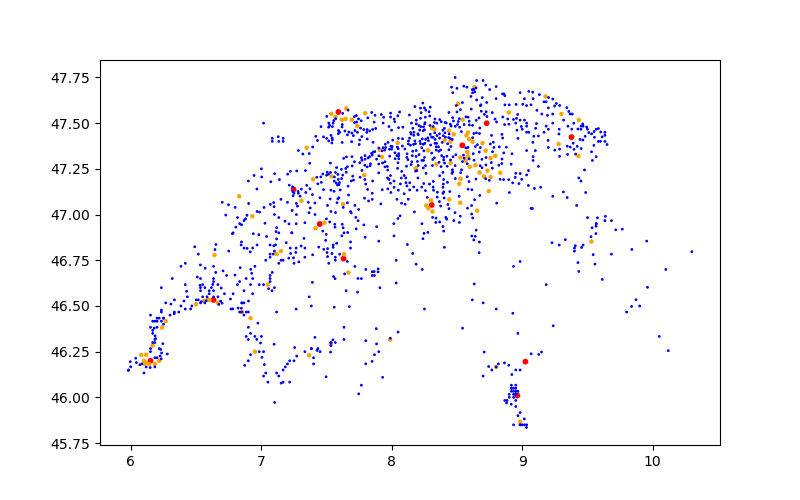

In [15]:
# close already open figures, applies if code is reexecuted
plt.close('all')    

# plot all points
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(points[:,0], points[:,1], marker='o', c=colors, s = size)

# Display cityname when hovering above with mouse
def callback(sel):
    pt = (sel.target[0], sel.target[1])
    sel.annotation.set_text(pt_city.get(pt,'unknown'))
    
crs = mplcursors.cursor(ax, hover=True)
crs.connect("add", callback) 